# Conceptualization
* This component takes two CSV files as input

In [1]:
# Import necessary libraries for data manipulation and visualization.
import pandas as pd  # Pandas for data handling
import numpy as np   # NumPy for numerical operations

import seaborn as sns           # Seaborn for data visualization
import matplotlib.pyplot as plt # Matplotlib for creating plots
%matplotlib inline

# Define a flag to control exporting, presumably for saving plots or data.
FLAG_EXPORT = True

# Define the output path where exported files will be saved.
out_path = 'assets/'

In [2]:
# Read a CSV file named "dataset_climatic.csv" into a Pandas DataFrame.
raw1 = pd.read_csv("dataset_climatic.csv", header=0)

# Rename the 'pression' column to 'pressure' for consistency or clarity.
raw1 = raw1.rename(columns={'pression': 'pressure'})

# Display the first few rows of the DataFrame to inspect the data.
raw1.head()

,timestamp,temp_celsius,pressure,precipitation,windspeed_mps
0,2018-01-31 00:00:00-02,21,1011.7,0.0,1.2
1,2018-01-31 01:00:00-02,21,1011.5,0.0,1.5
2,2018-01-31 02:00:00-02,20,1011.0,0.0,1.8
3,2018-01-31 03:00:00-02,20,1010.2,0.0,1.7
4,2018-01-31 04:00:00-02,20,1009.9,0.0,1.8


In [3]:
# Generate summary statistics for the DataFrame 'raw1'.
raw1.describe()

,temp_celsius,pressure,precipitation,windspeed_mps
count,16365.000000,16365.000000,16365.000000,16365.000000
mean,21.709502,1015.286227,0.093981,2.228555
std,3.870892,3.177252,0.504643,1.040920
min,10.000000,1005.100000,0.000000,0.000000
25%,19.000000,1013.100000,0.000000,1.500000
50%,21.000000,1015.100000,0.000000,2.000000
75%,24.000000,1017.400000,0.000000,2.800000
max,34.000000,1026.300000,18.000000,7.900000


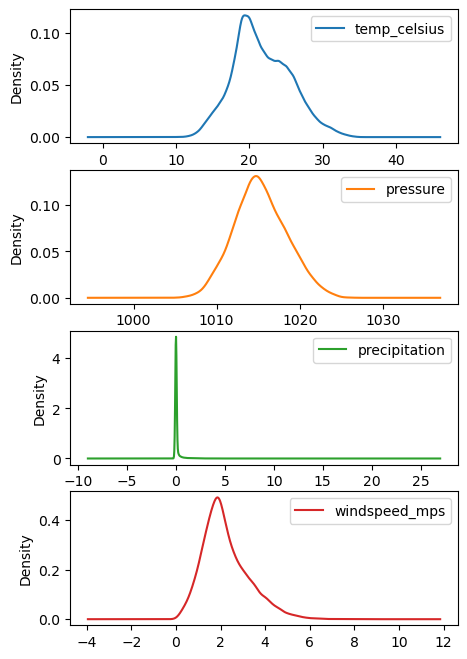

In [4]:
# Generate Kernel Density Estimation (KDE) plots for each numerical column in the DataFrame 'raw1'.
raw1.plot.kde(subplots=True, sharex=False, figsize=(5, 8), layout=(4, 1))

# Check if the FLAG_EXPORT is set to True (presumably for exporting plots).
if FLAG_EXPORT:
    # Save the generated KDE plots as a PDF file named "KDE_climaTIC.pdf".
    plt.savefig("KDE_climaTIC.pdf", format='pdf')

In [5]:
# Convert the 'timestamp' column to a datetime format, assuming the timestamps are in UTC.
raw1['timestamp'] = pd.to_datetime(raw1['timestamp'], utc=True)

# Set the DataFrame index to the 'timestamp' column.
raw1 = raw1.set_index(raw1['timestamp'])

# Drop the 'timestamp' column as it's now the index.
raw1 = raw1.drop('timestamp', axis=1)

# Adjust the index to UTC-2 (2 hours behind UTC) using tz_convert.
raw1 = raw1.set_index(raw1.index.tz_convert(None) + pd.offsets.Hour(-2))

# Print the first few rows of the DataFrame after these transformations.
print(raw1.head())

                     temp_celsius  pressure  precipitation  windspeed_mps
timestamp                                                                
2018-01-31 00:00:00            21    1011.7            0.0            1.2
2018-01-31 01:00:00            21    1011.5            0.0            1.5
2018-01-31 02:00:00            20    1011.0            0.0            1.8
2018-01-31 03:00:00            20    1010.2            0.0            1.7
2018-01-31 04:00:00            20    1009.9            0.0            1.8


float64


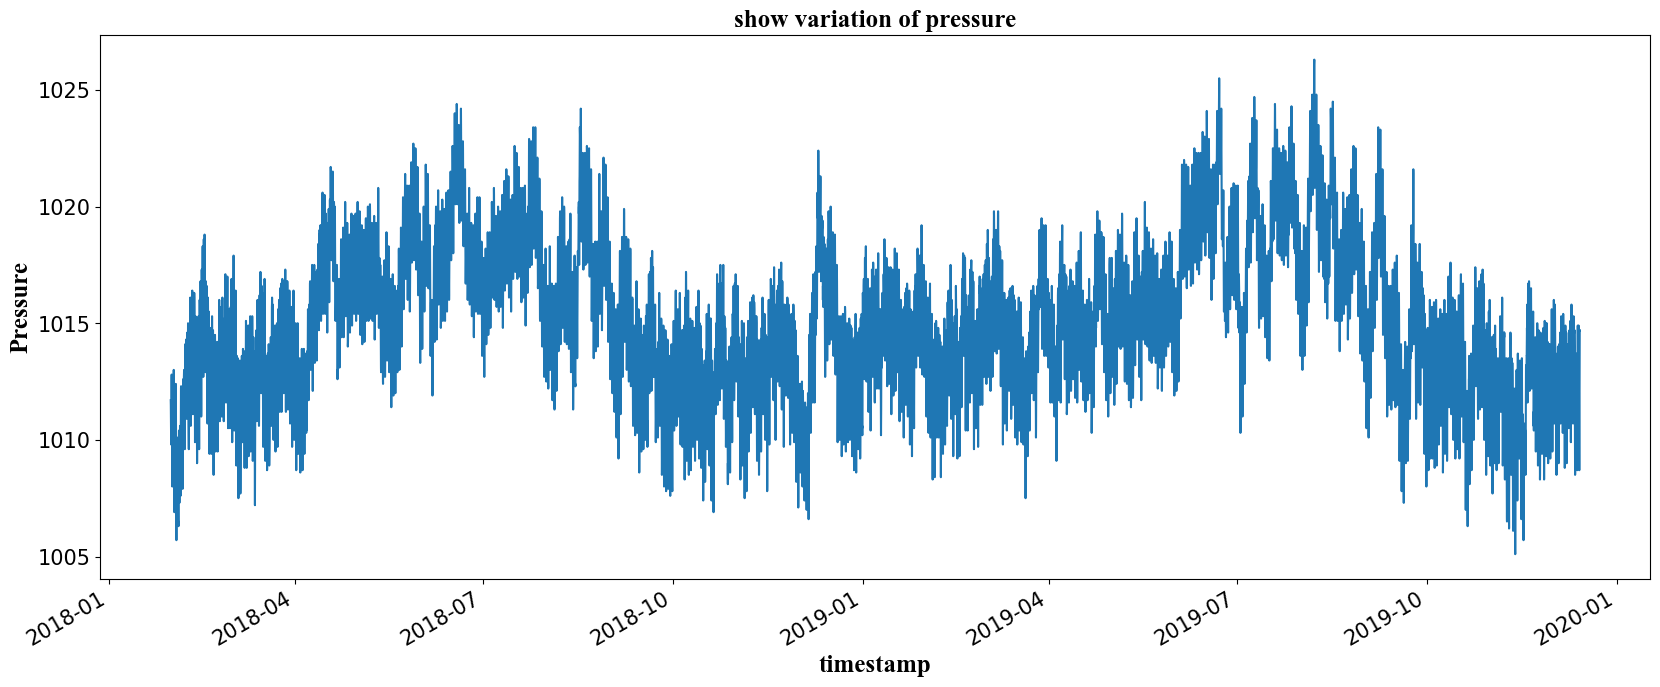

In [6]:
# Create a new figure for the plot with a specific size.
plt.figure(figsize=(20, 8))

# Set the y-axis label with custom font properties.
plt.ylabel("Pressure", fontsize=18, fontname="Times New Roman", fontweight="bold")

# Set the x-axis label with custom font properties.
plt.xlabel("Date", fontsize=18, fontname="Times New Roman", fontweight="bold")

# Set the title of the plot with custom font properties.
plt.title("Variation of Pressure", fontsize=18, fontname="Times New Roman", fontweight="bold")

# Replace any NaN values in the 'pressure' column with 0.
raw1["pressure"] = raw1["pressure"].replace(np.NaN, 0)

# Print the data type of the 'pressure' column.
print(raw1["pressure"].dtype)

# Generate a basic plot of the 'pressure' column.
raw1["pressure"].plot()

# Customize tick parameters for both axes with a larger font size.
plt.tick_params(axis='both', which='major', labelsize=15)

# Save the plot as a PNG and PDF file in the current directory.
plt.savefig('Electricity_Price.png', format='png')
plt.savefig('Electricity_Price.pdf', format='pdf')

In [7]:
# Resample the 'raw1' DataFrame at 10-minute intervals and interpolate missing values using linear interpolation.
# The 'limit_area' parameter specifies that interpolation should occur only inside data boundaries.
filtered1 = raw1.resample('10min').interpolate(method='linear', limit_area='inside')

# Electrical database exploration
* Convert index to timestamp
* Resampled by hour
* Calculate load factor

In [8]:
# Read another CSV file named "dataset_electric.csv" into a new Pandas DataFrame 'raw2'.
raw2 = pd.read_csv("dataset_electric.csv", header=0)

# Drop the 's3' column from the DataFrame 'raw2'.
raw2 = raw2.drop('s3', axis=1)

# Generate summary statistics for the DataFrame 'raw2'.
raw2.describe()

,p3,cosphi,voltage,month,hour,dayofweek
count,857147.000000,857147.000000,857147.000000,987841.000000,987841.000000,987841.000000
mean,183.425452,0.953158,223.184563,6.672017,11.499988,3.000001
std,155.860108,0.032707,2.766074,3.268192,6.922196,2.000000
min,48.737500,0.830174,208.966000,1.000000,0.000000,0.000000
25%,74.080833,0.925084,221.431000,4.000000,5.000000,1.000000
50%,89.919167,0.946635,223.134667,7.000000,11.000000,3.000000
75%,287.483155,0.990457,224.994306,9.000000,17.000000,5.000000
max,713.428333,0.999890,237.393444,12.000000,23.000000,6.000000


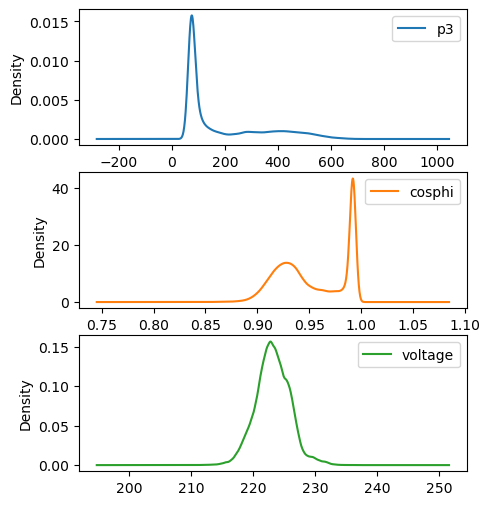

In [9]:
# Generate Kernel Density Estimation (KDE) plots for specific columns in the 'raw2' DataFrame.
raw2[['p3', 'cosphi', 'voltage']].plot.kde(subplots=True, sharex=False, figsize=(5, 6), layout=(3, 1))

# Check if the FLAG_EXPORT is set to True (presumably for exporting plots).
if FLAG_EXPORT:
    # Save the generated KDE plots as a PDF file named 'KDEelectric.pdf'.
    plt.savefig('KDEelectric.pdf', format='pdf')

In [10]:
# Convert the 'timestamp' column in 'raw2' to a datetime format.
raw2['timestamp'] = pd.to_datetime(raw2['timestamp'])

# Set the DataFrame index to the 'timestamp' column.
raw2 = raw2.set_index(raw2['timestamp'])

# Drop the 'timestamp' column as it's now the index.
raw2 = raw2.drop('timestamp', axis=1)

In [11]:
# Resample the 'raw2' DataFrame at 10-minute intervals and aggregate data using various functions.
resampled2 = raw2.resample('10min').agg({
    'voltage': ['mean', 'count'],    # Calculate mean and count for 'voltage'
    'cosphi': ['mean', 'std'],       # Calculate mean and standard deviation for 'cosphi'
    'month': ['mean'],               # Calculate mean for 'month'
    'hour': ['mean'],                # Calculate mean for 'hour'
    'dayofweek': ['mean'],           # Calculate mean for 'dayofweek'
    'p3': ['mean', 'max', 'std']     # Calculate mean, max, and standard deviation for 'p3'
})

# Join multi-level column names into a single level.
resampled2.columns = resampled2.columns.map('_'.join)

# Drop rows with NaN values.
resampled2 = resampled2.dropna()

In [12]:
# Filter the 'resampled2' DataFrame to select rows where 'voltage_count' is equal to 10.
filtered2 = resampled2[resampled2['voltage_count'] == 10]

# Drop the 'voltage_count' column from the filtered DataFrame.
filtered2 = filtered2.drop('voltage_count', axis=1)

In [13]:
# Calculate the 'load_factor' by dividing the mean of 'p3_mean' by the max of 'p3_max'.
filtered2['load_factor'] = filtered2['p3_mean'] / filtered2['p3_max']

In [14]:
# Drop the 'p3_max' column from the 'filtered2' DataFrame.
filtered2 = filtered2.drop('p3_max', axis=1)

In [15]:
filtered2.head()

,voltage_mean,cosphi_mean,cosphi_std,month_mean,hour_mean,dayofweek_mean,p3_mean,p3_std,load_factor
timestamp,,,,,,,,,
2018-02-01 00:00:00,222.422553,0.931323,0.003132,2.0,0.0,4.0,76.384250,2.901398,0.936588
2018-02-01 00:10:00,221.822300,0.938584,0.003327,2.0,0.0,4.0,79.409299,4.679058,0.916590
2018-02-01 00:20:00,222.539326,0.933304,0.004393,2.0,0.0,4.0,74.200246,3.366907,0.950006
2018-02-01 00:30:00,222.744070,0.934903,0.005175,2.0,0.0,4.0,76.059915,2.742411,0.949632
2018-02-01 00:40:00,222.832179,0.936927,0.003765,2.0,0.0,4.0,77.216275,2.191767,0.963748


# Data integration

In [16]:
# Merge the 'filtered1' and 'filtered2' DataFrames using an inner join based on their indices.
# Also, cast the merged DataFrame to a float data type.
merged = pd.merge(filtered1, filtered2, how='inner', left_index=True, right_index=True).astype('float')

In [17]:
# Set values in the 'precipitation' column to 0 where they are less than 0.
merged.loc[merged['precipitation'] < 0, 'precipitation'] = 0

In [18]:
# Rename columns in the 'merged' DataFrame to more descriptive names.
merged = merged.rename(columns={
    'temp_celsius': 'temperature',        # Rename 'temp_celsius' to 'temperature'
    'pressure': 'pressure',              # Rename 'pressure' to 'pressure'
    'precipitation': 'precipitation',    # Rename 'precipitation' to 'precipitation'
    'windspeed_mps': 'windspeed',        # Rename 'windspeed_mps' to 'windspeed'
    'voltage_mean': 'voltage',           # Rename 'voltage_mean' to 'voltage'
    'cosphi_mean': 'cos_phi',            # Rename 'cosphi_mean' to 'cos_phi'
    'cosphi_std': 'cos_phi_std',         # Rename 'cosphi_std' to 'cos_phi_std'
    'load_factor': 'load_factor',        # Rename 'load_factor' to 'load_factor'
    'month_mean': 'month',               # Rename 'month_mean' to 'month'
    'dayofweek_mean': 'day_of_week',     # Rename 'dayofweek_mean' to 'day_of_week'
    'hour_mean': 'hour',                # Rename 'hour_mean' to 'hour'
    'p3_std': 'p3_std',                  # Rename 'p3_std' to 'p3_std'
    'p3_mean': 'p3'                     # Rename 'p3_mean' to 'p3'
})

In [19]:
# Check if the FLAG_EXPORT is set to True (presumably for exporting data statistics).
if FLAG_EXPORT:
    # Generate summary statistics for the 'merged' DataFrame and save them to a LaTeX table file.
    merged.describe().to_latex('table_dataset_stats.tex')

C:\Users\Guest1\AppData\Local\Temp\ipykernel_11368\1885669551.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  if FLAG_EXPORT: merged.describe().to_latex('table_dataset_stats.tex')


In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84926 entries, 2018-02-01 00:00:00 to 2019-12-13 23:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    84926 non-null  float64
 1   pressure       84926 non-null  float64
 2   precipitation  84926 non-null  float64
 3   windspeed      84926 non-null  float64
 4   voltage        84926 non-null  float64
 5   cos_phi        84926 non-null  float64
 6   cos_phi_std    84926 non-null  float64
 7   month          84926 non-null  float64
 8   hour           84926 non-null  float64
 9   day_of_week    84926 non-null  float64
 10  p3             84926 non-null  float64
 11  p3_std         84926 non-null  float64
 12  load_factor    84926 non-null  float64
dtypes: float64(13)
memory usage: 9.1 MB


In [21]:
# Extract and display the first few rows of data from 'merged' DataFrame
# that fall within the date range from March 1, 2019, at 00:00:00 to May 1, 2019, at 00:00:00.
subset_data = merged['2019-03-01 00:00:00':'2019-05-01 00:00:00'].head()

,temperature,pressure,precipitation,windspeed,voltage,cos_phi,cos_phi_std,month,hour,day_of_week,p3,p3_std,load_factor
timestamp,,,,,,,,,,,,,
2019-03-01 00:00:00,20.0,1017.500000,0.0,0.900000,222.118755,0.933534,0.002797,3.0,0.0,5.0,78.996296,3.237774,0.931121
2019-03-01 00:10:00,20.0,1017.383333,0.0,0.883333,221.155083,0.938093,0.006035,3.0,0.0,5.0,81.207083,2.931077,0.952576
2019-03-01 00:20:00,20.0,1017.266667,0.0,0.866667,221.255644,0.933861,0.002610,3.0,0.0,5.0,78.070083,3.206031,0.953887
2019-03-01 00:30:00,20.0,1017.150000,0.0,0.850000,221.314422,0.937841,0.002337,3.0,0.0,5.0,81.138750,1.597699,0.965487
2019-03-01 00:40:00,20.0,1017.033333,0.0,0.833333,221.310550,0.935942,0.002764,3.0,0.0,5.0,78.283333,4.982127,0.913707


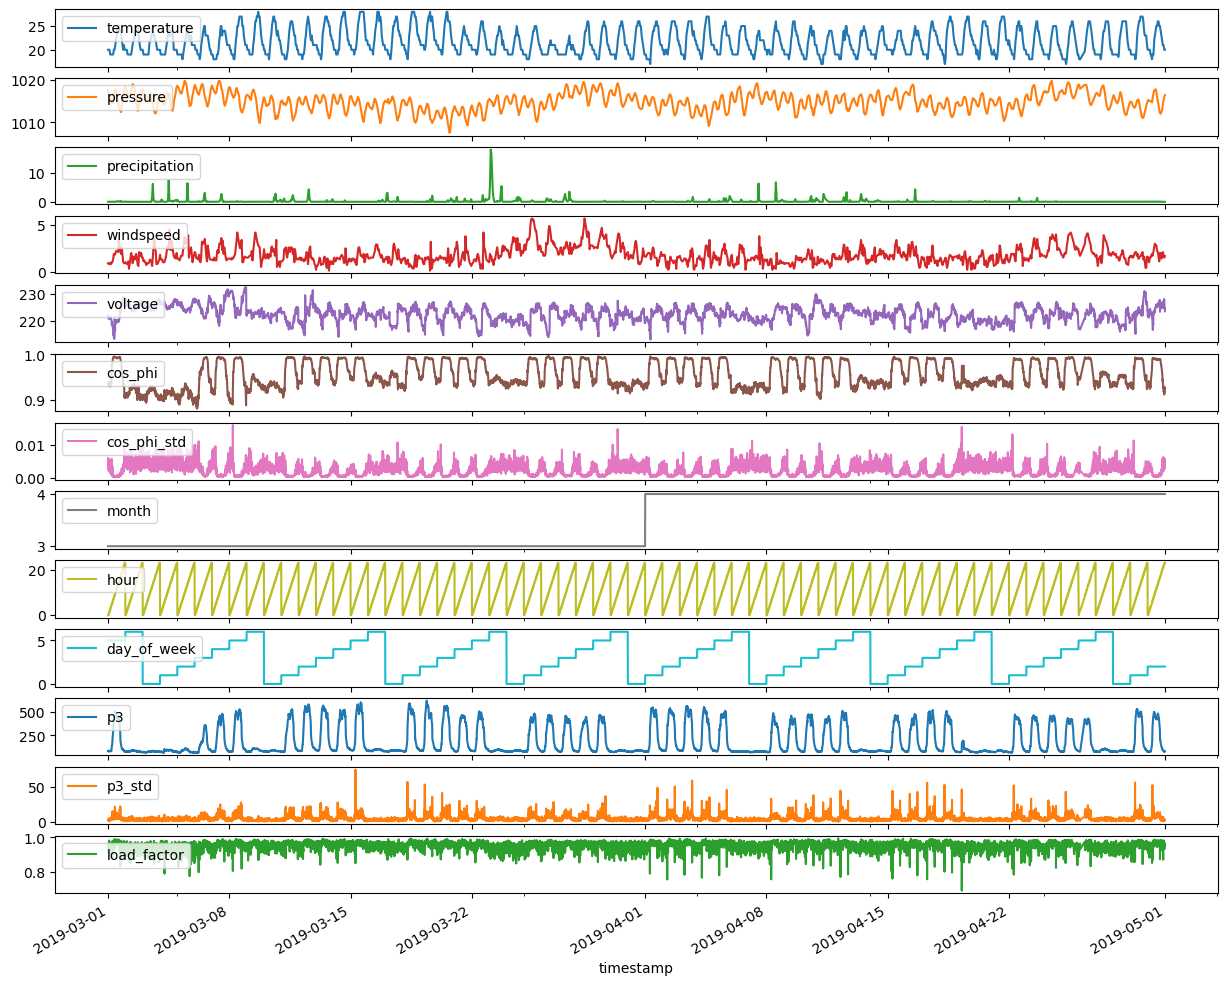

In [22]:
# Create subplots for each column within the specified date range and plot them.
Axis = merged['2019-03-01 00:00:00':'2019-04-30 23:59:59'].plot(subplots=True, sharex=True, figsize=(15, 13))

# Add legends to each subplot, positioning them at the upper left corner.
for k in range(0, merged.shape[1], 1):
    Axis[k].legend(loc='upper left')

# Check if the FLAG_EXPORT is set to True (presumably for exporting the plot).
if FLAG_EXPORT:
    # Save the plot as an SVG file named 'graph_temporal.svg'.
    plt.savefig('graph_temporal.svg', format='svg')

In [23]:
merged.describe()

,temperature,pressure,precipitation,windspeed,voltage,cos_phi,cos_phi_std,month,hour,day_of_week,p3,p3_std,load_factor
count,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000
mean,21.606675,1015.557522,0.078656,2.249284,223.184579,0.953134,0.002702,6.204814,11.535972,3.022961,183.422097,5.503859,0.948770
std,3.846077,3.098239,0.426773,1.023453,2.747639,0.032593,0.002173,3.113732,6.925896,1.982185,155.619762,4.543470,0.025153
min,10.000000,1005.700000,0.000000,0.000000,210.030339,0.853330,0.000076,1.000000,0.000000,0.000000,52.673333,0.424814,0.641996
25%,19.000000,1013.433333,0.000000,1.550000,221.439586,0.924797,0.000692,4.000000,6.000000,1.000000,74.133104,2.722198,0.935813
50%,21.000000,1015.416667,0.000000,2.050000,223.130786,0.946207,0.002361,6.000000,12.000000,3.000000,89.419042,4.055262,0.953135
75%,24.333333,1017.633333,0.000000,2.800000,224.990057,0.990512,0.004066,9.000000,18.000000,5.000000,287.467708,6.948134,0.966622
max,34.000000,1026.300000,18.000000,7.900000,236.857867,0.997968,0.026059,12.000000,23.000000,6.000000,692.232000,81.669494,0.995246


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84926 entries, 2018-02-01 00:00:00 to 2019-12-13 23:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    84926 non-null  float64
 1   pressure       84926 non-null  float64
 2   precipitation  84926 non-null  float64
 3   windspeed      84926 non-null  float64
 4   voltage        84926 non-null  float64
 5   cos_phi        84926 non-null  float64
 6   cos_phi_std    84926 non-null  float64
 7   month          84926 non-null  float64
 8   hour           84926 non-null  float64
 9   day_of_week    84926 non-null  float64
 10  p3             84926 non-null  float64
 11  p3_std         84926 non-null  float64
 12  load_factor    84926 non-null  float64
dtypes: float64(13)
memory usage: 11.1 MB


In [25]:
# Math and linear algebra
import pandas as pd
import math
import numpy as np

# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Utils
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
import gc

In [26]:
merged.head()

,temperature,pressure,precipitation,windspeed,voltage,cos_phi,cos_phi_std,month,hour,day_of_week,p3,p3_std,load_factor
timestamp,,,,,,,,,,,,,
2018-02-01 00:00:00,21.000000,1012.4,0.200000,2.000000,222.422553,0.931323,0.003132,2.0,0.0,4.0,76.384250,2.901398,0.936588
2018-02-01 00:10:00,20.833333,1012.3,0.216667,2.016667,221.822300,0.938584,0.003327,2.0,0.0,4.0,79.409299,4.679058,0.916590
2018-02-01 00:20:00,20.666667,1012.2,0.233333,2.033333,222.539326,0.933304,0.004393,2.0,0.0,4.0,74.200246,3.366907,0.950006
2018-02-01 00:30:00,20.500000,1012.1,0.250000,2.050000,222.744070,0.934903,0.005175,2.0,0.0,4.0,76.059915,2.742411,0.949632
2018-02-01 00:40:00,20.333333,1012.0,0.266667,2.066667,222.832179,0.936927,0.003765,2.0,0.0,4.0,77.216275,2.191767,0.963748


float64


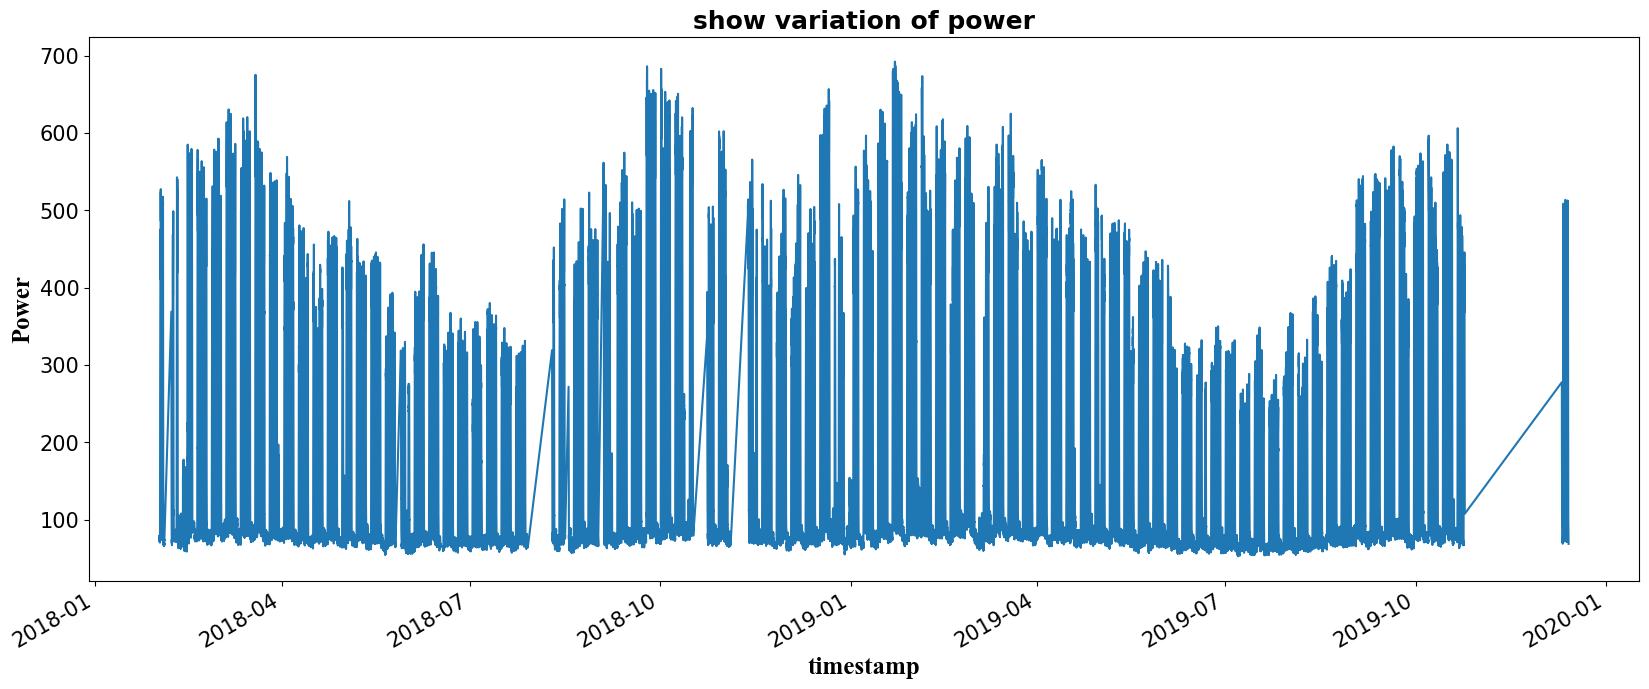

In [27]:
# Create a new figure for the plot with a specific size.
plt.figure(figsize=(20, 8))

# Set the y-axis label with custom font properties.
plt.ylabel("Power", fontsize=18, fontname="Times New Roman", fontweight="bold")

# Set the x-axis label with custom font properties.
plt.xlabel("Date", fontsize=18, fontname="Times New Roman", fontweight="bold")

# Set the title of the plot with custom font properties.
plt.title("Variation of Power", fontsize=18, fontweight="bold")

# Replace any NaN values in the 'p3' column with 0.
merged["p3"] = merged["p3"].replace(np.NaN, 0)

# Print the data type of the 'pressure' column.
print(merged["pressure"].dtype)

# Generate a basic plot of the 'p3' column.
merged["p3"].plot()

# Customize tick parameters for both axes with a larger font size.
plt.tick_params(axis='both', which='major', labelsize=15)

# Save the plot as both a PNG and PDF file in the current directory.
plt.savefig('Electricity_Price.png', format='png')
plt.savefig('Electricity_Price.pdf', format='pdf')

In [28]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84926 entries, 2018-02-01 00:00:00 to 2019-12-13 23:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    84926 non-null  float64
 1   pressure       84926 non-null  float64
 2   precipitation  84926 non-null  float64
 3   windspeed      84926 non-null  float64
 4   voltage        84926 non-null  float64
 5   cos_phi        84926 non-null  float64
 6   cos_phi_std    84926 non-null  float64
 7   month          84926 non-null  float64
 8   hour           84926 non-null  float64
 9   day_of_week    84926 non-null  float64
 10  p3             84926 non-null  float64
 11  p3_std         84926 non-null  float64
 12  load_factor    84926 non-null  float64
dtypes: float64(13)
memory usage: 11.1 MB


In [29]:
merged.columns

Index(['temperature', 'pressure', 'precipitation', 'windspeed', 'voltage',
       'cos_phi', 'cos_phi_std', 'month', 'hour', 'day_of_week', 'p3',
       'p3_std', 'load_factor'],
      dtype='object')

In [30]:
merged.describe()

,temperature,pressure,precipitation,windspeed,voltage,cos_phi,cos_phi_std,month,hour,day_of_week,p3,p3_std,load_factor
count,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000,84926.000000
mean,21.606675,1015.557522,0.078656,2.249284,223.184579,0.953134,0.002702,6.204814,11.535972,3.022961,183.422097,5.503859,0.948770
std,3.846077,3.098239,0.426773,1.023453,2.747639,0.032593,0.002173,3.113732,6.925896,1.982185,155.619762,4.543470,0.025153
min,10.000000,1005.700000,0.000000,0.000000,210.030339,0.853330,0.000076,1.000000,0.000000,0.000000,52.673333,0.424814,0.641996
25%,19.000000,1013.433333,0.000000,1.550000,221.439586,0.924797,0.000692,4.000000,6.000000,1.000000,74.133104,2.722198,0.935813
50%,21.000000,1015.416667,0.000000,2.050000,223.130786,0.946207,0.002361,6.000000,12.000000,3.000000,89.419042,4.055262,0.953135
75%,24.333333,1017.633333,0.000000,2.800000,224.990057,0.990512,0.004066,9.000000,18.000000,5.000000,287.467708,6.948134,0.966622
max,34.000000,1026.300000,18.000000,7.900000,236.857867,0.997968,0.026059,12.000000,23.000000,6.000000,692.232000,81.669494,0.995246


In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2



# Separate the features and target variable
X = merged.drop(columns=["p3"])
y = merged["p3"]

# Reset the index of the y variable
# y = y.reset_index(drop=True)

# Convert the target variable to binary labels
y_binary = np.where(y >= y.mean(), 1, 0)

lb = LabelBinarizer()
y = lb.fit_transform(y_binary)

# Select the K best features using chi-squared score
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support(indices=True)]
selected_features

Index(['temperature', 'precipitation', 'windspeed', 'voltage', 'cos_phi',
       'cos_phi_std', 'month', 'hour', 'p3_std', 'load_factor'],
      dtype='object')

In [32]:
merged = merged[['temperature', 'precipitation', 'windspeed', 'voltage', 'cos_phi',
       'cos_phi_std', 'month', 'hour', 'p3_std', 'load_factor','p3']]


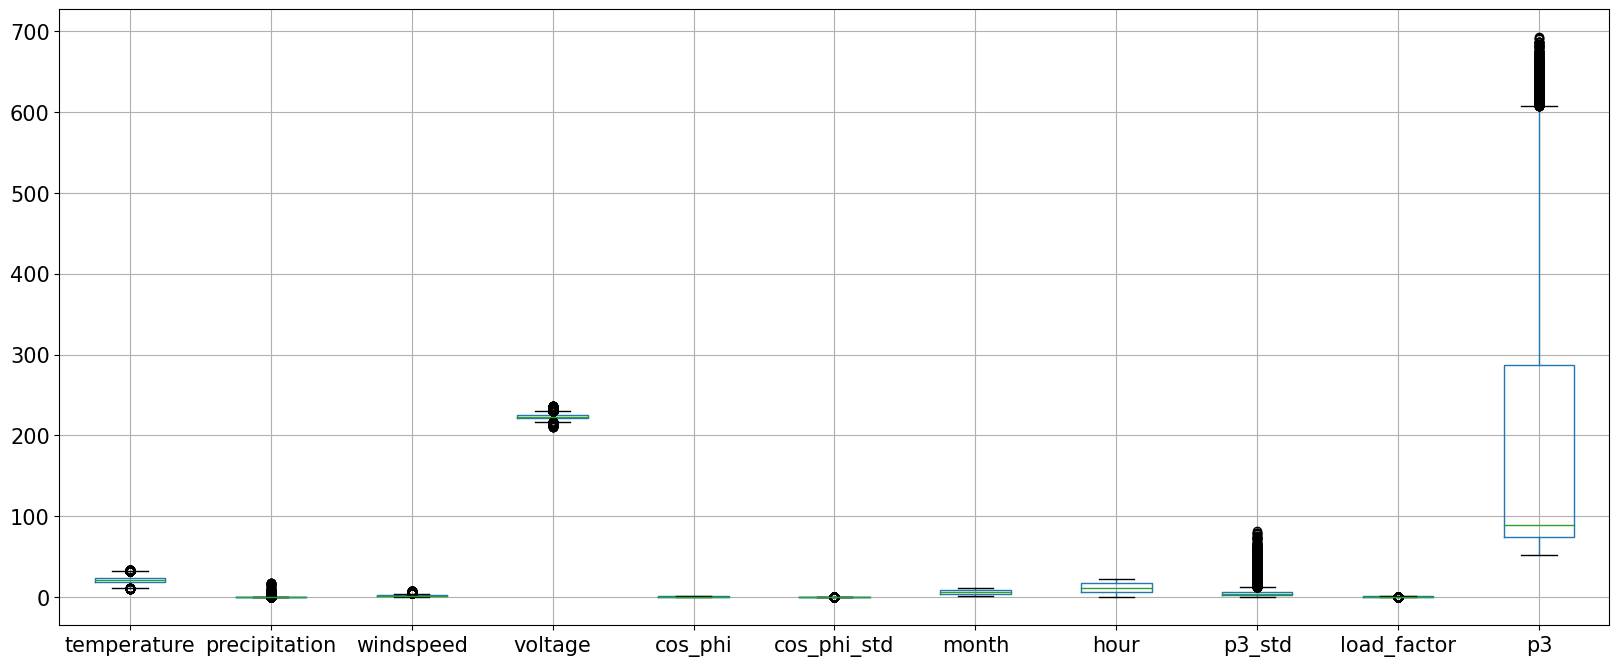

In [33]:
plt.figure(figsize=(20,8))
# Box Plot
import seaborn as sns
boxplot = merged.boxplot(column=['temperature', 'precipitation', 'windspeed', 'voltage', 'cos_phi',
       'cos_phi_std', 'month', 'hour', 'p3_std', 'load_factor','p3'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Outliers_data.png', format='png')
plt.savefig('Outliers_data.pdf', format='pdf')

In [34]:
for col in merged.columns:
    if col != 'p3':
        median = merged[col].median()
        std = merged[col].std()
        lower_bound = median - 3*std
        upper_bound = median + 3*std
        merged.loc[(merged[col] < lower_bound) | (merged[col] > upper_bound), col] = median

# show the new data
print(merged)

                     temperature  precipitation  windspeed     voltage  \
timestamp                                                                
2018-02-01 00:00:00    21.000000       0.200000   2.000000  222.422553   
2018-02-01 00:10:00    20.833333       0.216667   2.016667  221.822300   
2018-02-01 00:20:00    20.666667       0.233333   2.033333  222.539326   
2018-02-01 00:30:00    20.500000       0.250000   2.050000  222.744070   
2018-02-01 00:40:00    20.333333       0.266667   2.066667  222.832179   
...                          ...            ...        ...         ...   
2019-12-13 22:20:00    21.666667       0.000000   0.366667  225.512978   
2019-12-13 22:30:00    21.500000       0.000000   0.450000  226.156717   
2019-12-13 22:40:00    21.333333       0.000000   0.533333  226.981687   
2019-12-13 22:50:00    21.166667       0.000000   0.616667  226.475511   
2019-12-13 23:00:00    21.000000       0.000000   0.700000  226.586756   

                      cos_phi  cos_ph

In [35]:
merged.shape

(84926, 11)

In [36]:
merged = merged[merged['p3'] <= 105]

In [37]:
merged = merged[merged['p3_std'] <= 10]

In [38]:
merged.describe()

,temperature,precipitation,windspeed,voltage,cos_phi,cos_phi_std,month,hour,p3_std,load_factor,p3
count,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000,47932.000000
mean,20.437345,0.035512,2.042403,223.216483,0.927248,0.003949,6.254465,10.943921,3.184233,0.942765,76.665224
std,3.312441,0.141484,0.821039,2.669233,0.016025,0.001641,3.077895,8.368517,1.295675,0.021270,9.945128
min,10.000000,0.000000,0.000000,214.937500,0.853330,0.000389,1.000000,0.000000,0.424814,0.877711,52.673333
25%,18.458333,0.000000,1.500000,221.371107,0.916615,0.002678,4.000000,3.000000,2.236938,0.929168,69.801142
50%,20.000000,0.000000,1.933333,223.156061,0.927100,0.003708,6.000000,10.000000,2.988412,0.945371,75.385375
75%,22.000000,0.000000,2.433333,224.984613,0.937587,0.004980,9.000000,20.000000,3.925728,0.958483,82.203833
max,32.500000,1.266667,5.116667,231.370206,0.985139,0.008877,12.000000,23.000000,9.948480,0.993886,104.998917


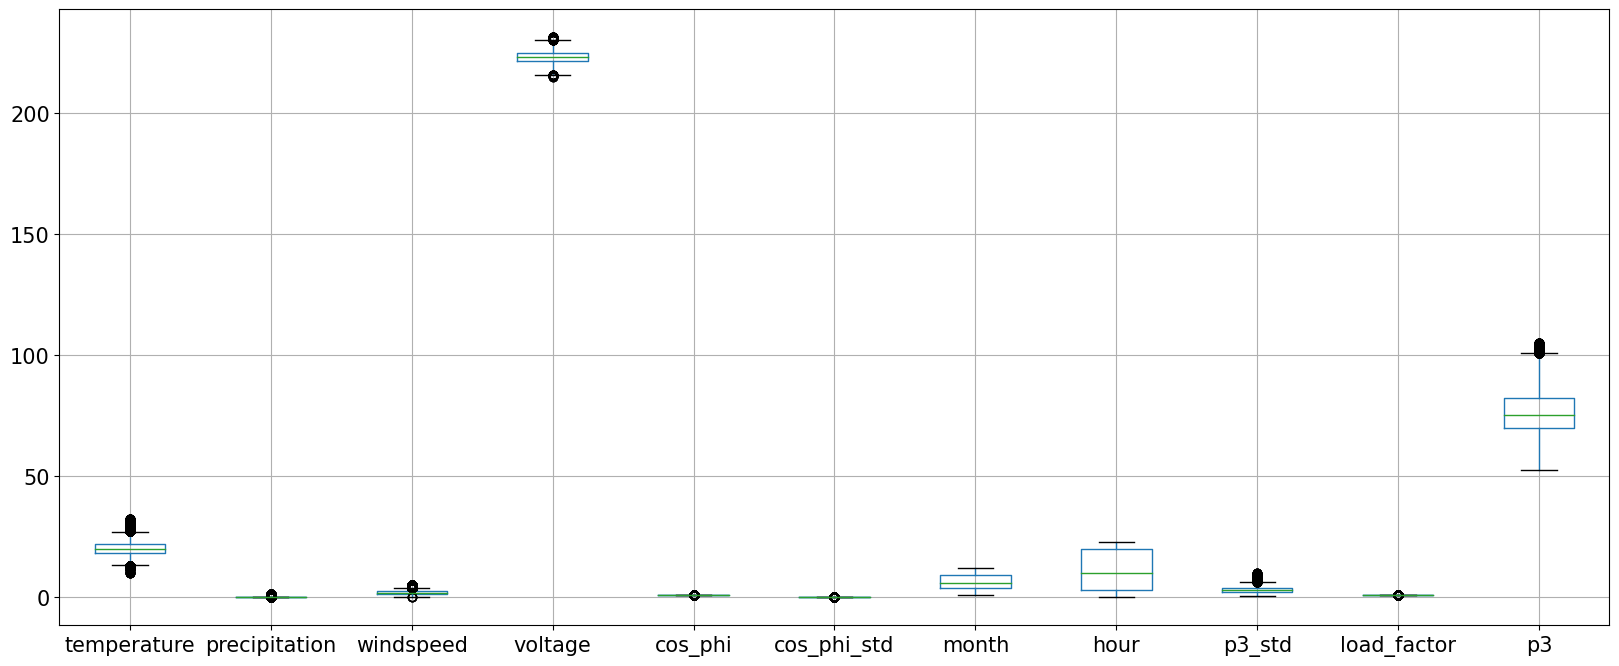

In [39]:
plt.figure(figsize=(20,8))
# Box Plot
import seaborn as sns
boxplot = merged.boxplot(column=['temperature', 'precipitation', 'windspeed', 'voltage', 'cos_phi',
       'cos_phi_std', 'month', 'hour', 'p3_std', 'load_factor','p3'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Outliers_data.png', format='png')
plt.savefig('Outliers_data.pdf', format='pdf')

(11, 11)
correlation with p3:
                     p3
p3             1.000000
cos_phi        0.644984
temperature    0.520951
hour           0.330611
p3_std         0.217955
voltage        0.137490
load_factor    0.099053
precipitation  0.035236
windspeed     -0.014505
month         -0.089774
cos_phi_std   -0.336197


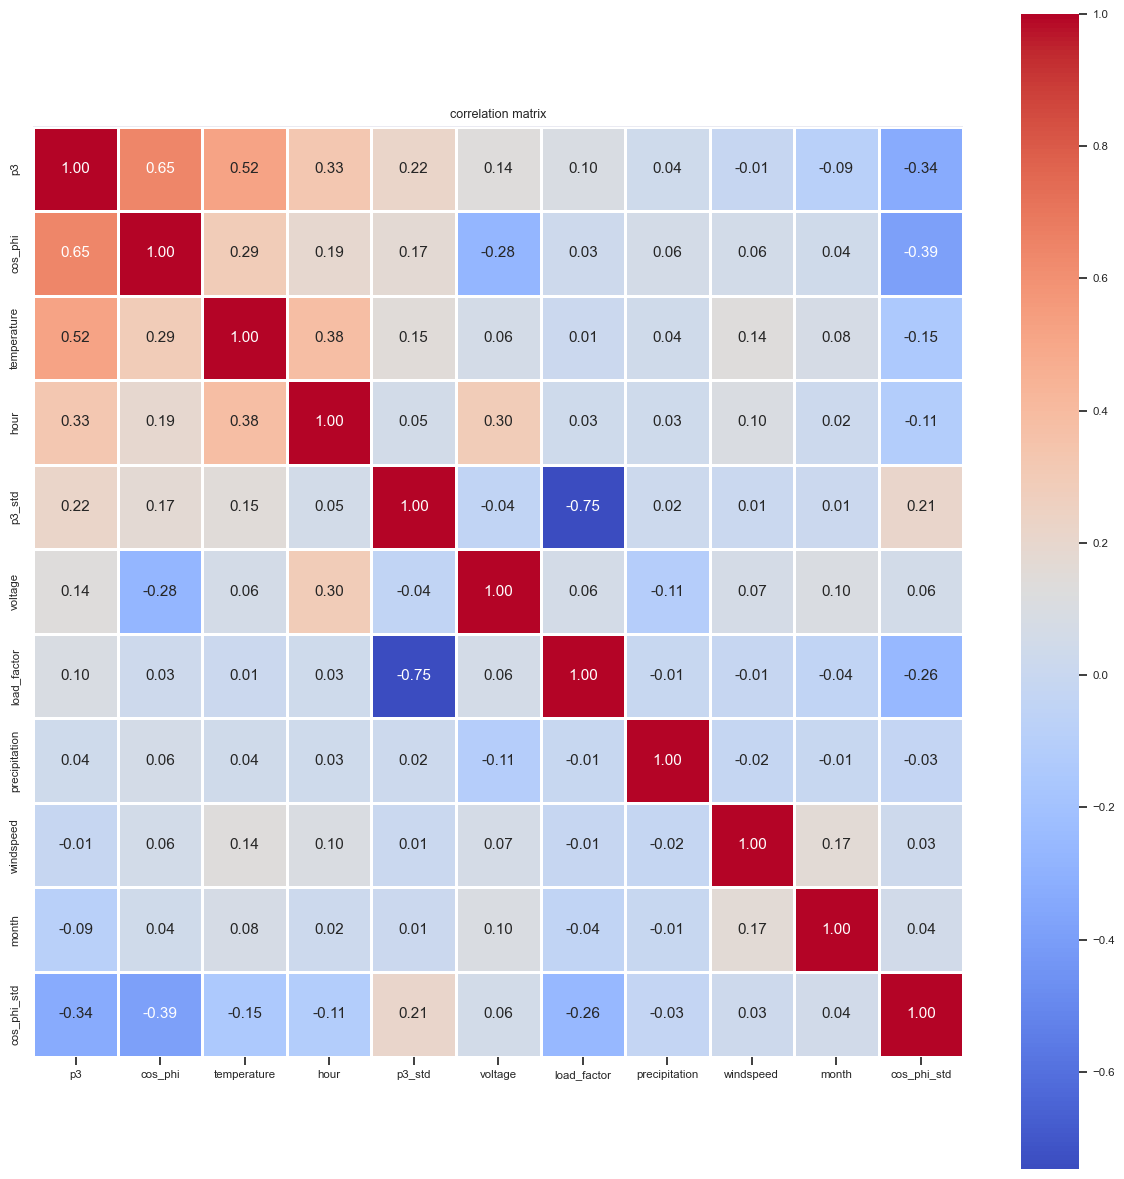

In [40]:
# check correlations of features with price
df_corr = merged.corr(method="pearson")
print(df_corr.shape)
print("correlation with p3:")
df_corrP = pd.DataFrame(df_corr["p3"].sort_values(ascending=False))
print(df_corrP)

# correlation matrix, limited to highly correlated features
df3 = merged[df_corrP.index]

idx = df3.corr().sort_values("p3", ascending=False).index
df3_sorted = df3.loc[:, idx]  # sort dataframe columns by their correlation with Appliances

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.set(font_scale=0.75)
ax = sns.heatmap(df3_sorted.corr().round(3),
                 annot=True,
                 square=True,
                 linewidths=.75,
                 cmap="coolwarm",
                 fmt=".2f",
                 annot_kws={"size": 11})
ax.xaxis.tick_bottom()

plt.title("correlation matrix")
plt.savefig('Correlation.png', format='png')
plt.savefig('Correlation.pdf', format='pdf')
plt.show()


In [41]:
X = df3.drop('p3', axis=1).values
y = df3['p3'].values
print(X.shape)
print(y.shape)
y1 = y.reshape(-1, 1)

(47932, 10)
(47932,)


In [42]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s1 = StandardScaler()

# standardization 
X1 = s.fit_transform(X)
y_2d = y.reshape(-1, 1) # Reshape y to a 2D array with a single column
y1 = s1.fit_transform(y_2d)
print(X1.shape)
print(y1.shape)

(47932, 10)
(47932, 1)


In [43]:
# X = merged.drop('p3', axis=1).values
# y = merged ['p3'].values.reshape(-1, 1)

# """X_mean = np.mean(X, axis=0)
# X_std = np.std(X, axis=0)
# X = (X - X_mean) / X_std

# merged = pd.merge (X, y, how='inner', left_index=True, right_index=True)"""
# from sklearn.preprocessing import StandardScaler
# s= StandardScaler()
# s1= StandardScaler()
# # standardization 
# X1 = s.fit_transform(X)
# y1 = s1.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=200)

In [45]:
y1.shape

(47932, 1)

In [46]:
y_train.shape

(33552, 1)

In [47]:
y_test.shape

(14380, 1)

In [48]:
from sklearn import metrics
import scipy as sp
import numpy as np
import math
from sklearn import metrics

def perturbation_rank(model, x, y, names, regression):
    errors = []

    for i in range(x.shape[1]):
        hold = np.array(x[:, i])
        np.random.shuffle(x[:, i])
        
        if regression:
            pred = model.predict(x)
            error = metrics.mean_absolute_error(y, pred)
        else:
            pred = model.predict_proba(x)
            error = metrics.log_loss(y, pred)
            
        errors.append(error)
        x[:, i] = hold
        
    max_error = np.max(errors)
    importance = [e/max_error for e in errors]

    data = {'name':names,'error':errors,'importance':importance}
    result = pd.DataFrame(data, columns = ['name','error','importance'])
    result.sort_values(by=['importance'], ascending=[0], inplace=True)
    result.reset_index(inplace=True, drop=True)
    return result

# *RIDGE REGRESSION*


In [49]:
#ridge regg.
import time
from sklearn.linear_model import Ridge
start_time = time.time()

model1 = Ridge()
model1.fit (X_train, y_train)

end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 0.011968135833740234 seconds


In [50]:
X_test1 = s.fit_transform(X_test)

y_hat1 = model1.predict(X_test1)
y_hat1n = s1.inverse_transform(y_hat1.reshape(-1, 1))
y_test1 = s1.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import sklearn.metrics as metrics
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test1, y_hat1n))
print("RMSE:",RMSE)
#mse

#mape
mape = mean_absolute_percentage_error(y_test1, y_hat1n) 
print("MAPE:",mape)
print ("Percentual:", metrics.mean_absolute_error(y_test1,y_hat1n)/y_test1.mean()*100, "%")


RMSE: 5.588523937262939
MAPE: 0.05741663812768239
Percentual: 5.696290696921264 %


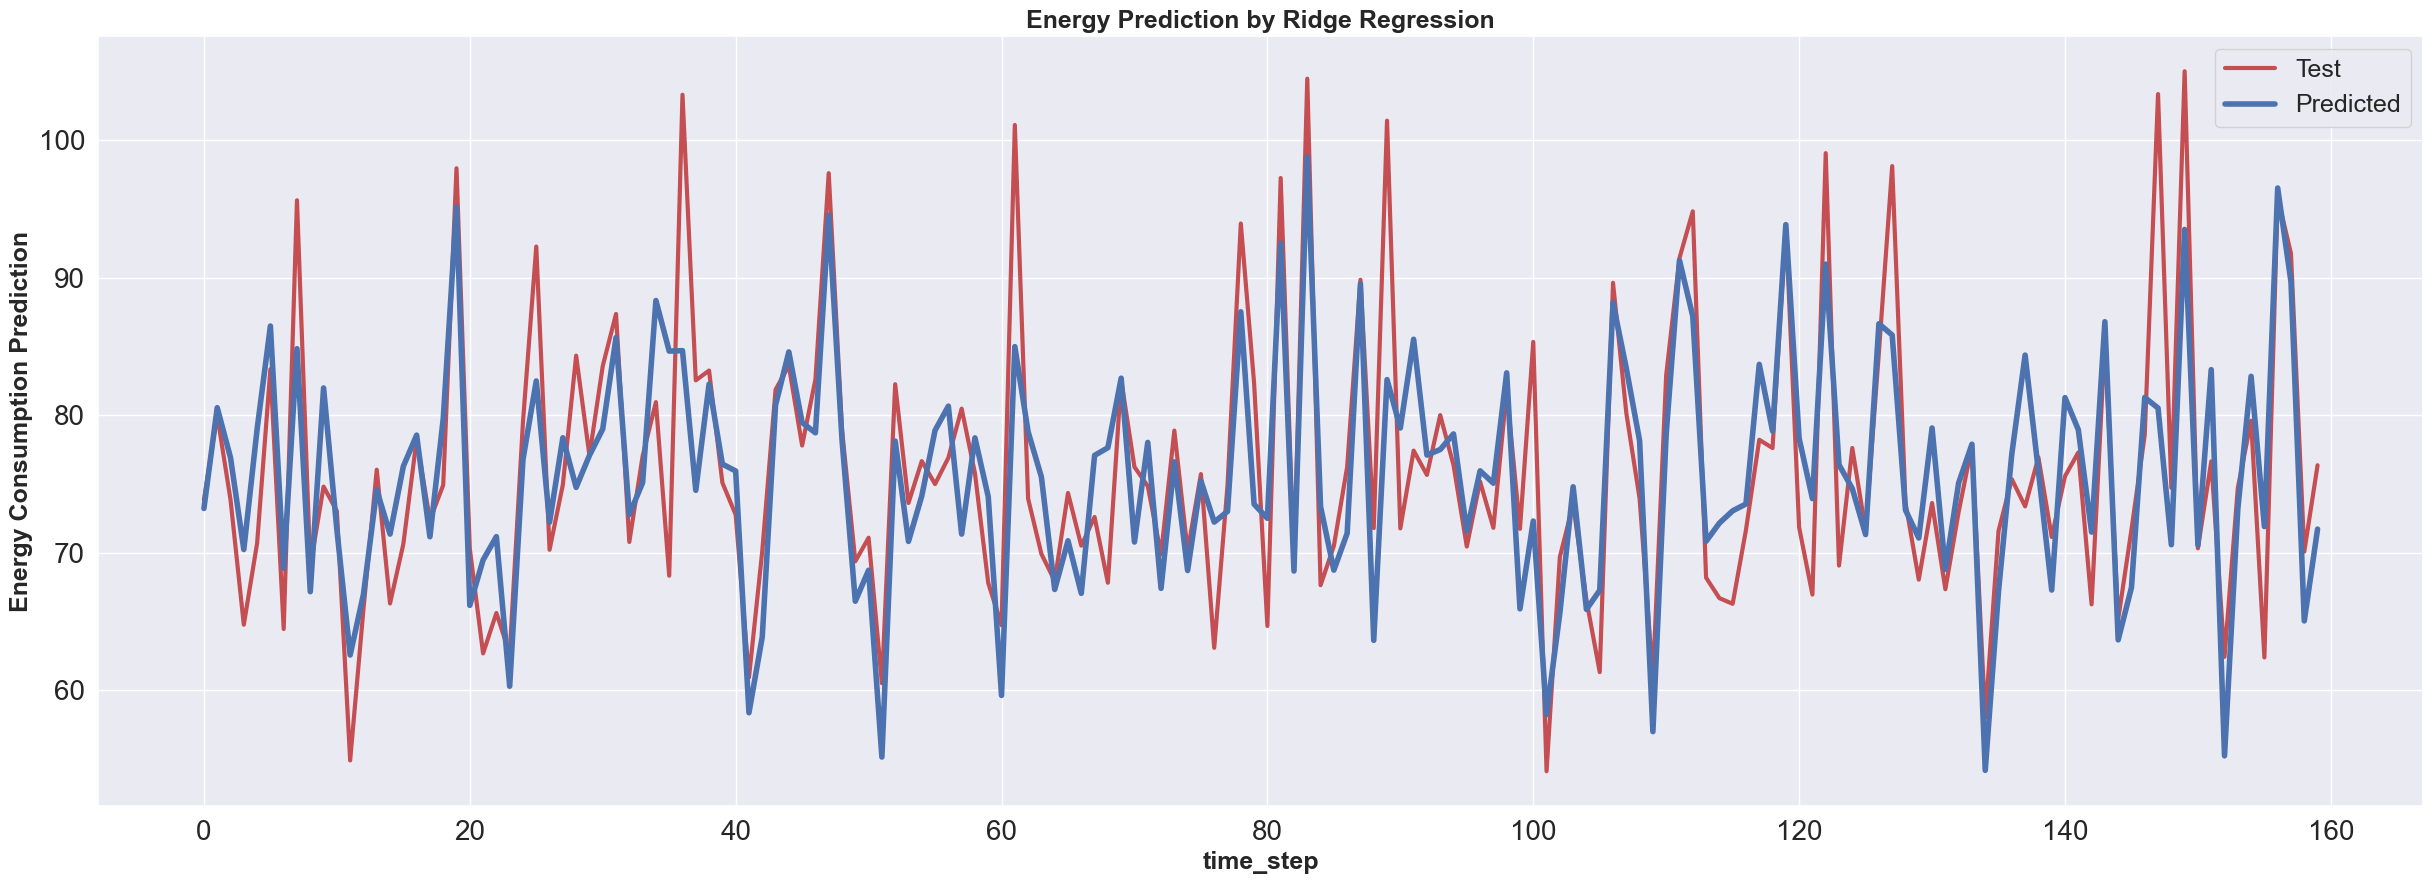

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# assuming y_test and y_hat1 are already defined

# downsample data to reduce number of data points
downsample_factor = 90
y_test_downsampled = y_test1[::downsample_factor]
y_hat1_downsampled = y_hat1n[::downsample_factor]

# create line plot
plt.figure(figsize=(30,10))
plt.plot(y_test_downsampled , 'r-', linewidth=3)
plt.plot(y_hat1_downsampled,'b-' , linewidth=4)
plt.xlabel('time_step', fontsize = 18, fontweight="bold")
plt.ylabel('Energy Consumption Prediction', fontsize = 18, fontweight="bold")
plt.legend (('Test','Predicted'), fontsize = 18)
plt.title("Energy Prediction by Ridge Regression", fontsize = 18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('PREDICTION by Ridge Regression Line Plot.png', format='png')
plt.savefig('PREDICTION by Ridge Regression Line Plot.pdf', format='pdf')
plt.show()

# *EXREMELY RANDOMIZED TREE*

In [52]:
#xrf
import time
from sklearn.ensemble import ExtraTreesRegressor
start_time = time.time()
model2 = ExtraTreesRegressor(max_depth=25,
                             n_estimators=400,
                             bootstrap=True,
                             max_samples=0.7)
model2.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

C:\Users\Guest1\AppData\Local\Temp\ipykernel_11368\1924099623.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)


Training time: 19.98242688179016 seconds


In [53]:
X_test1 = s.fit_transform(X_test)

y_hat2 = model2.predict(X_test1)
y_hat2n = s1.inverse_transform(y_hat2.reshape(-1, 1))
y_test1 = s1.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import sklearn.metrics as metrics
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test1, y_hat2n))
print("RMSE:",RMSE)
#mse

#mape
mape = mean_absolute_percentage_error(y_test1, y_hat2n) 
print("MAPE:",mape)
print ("Percentual:", metrics.mean_absolute_error(y_test1,y_hat2n)/y_test1.mean()*100, "%")

RMSE: 3.3635529627653025
MAPE: 0.032868682003098726
Percentual: 3.286631263016239 %


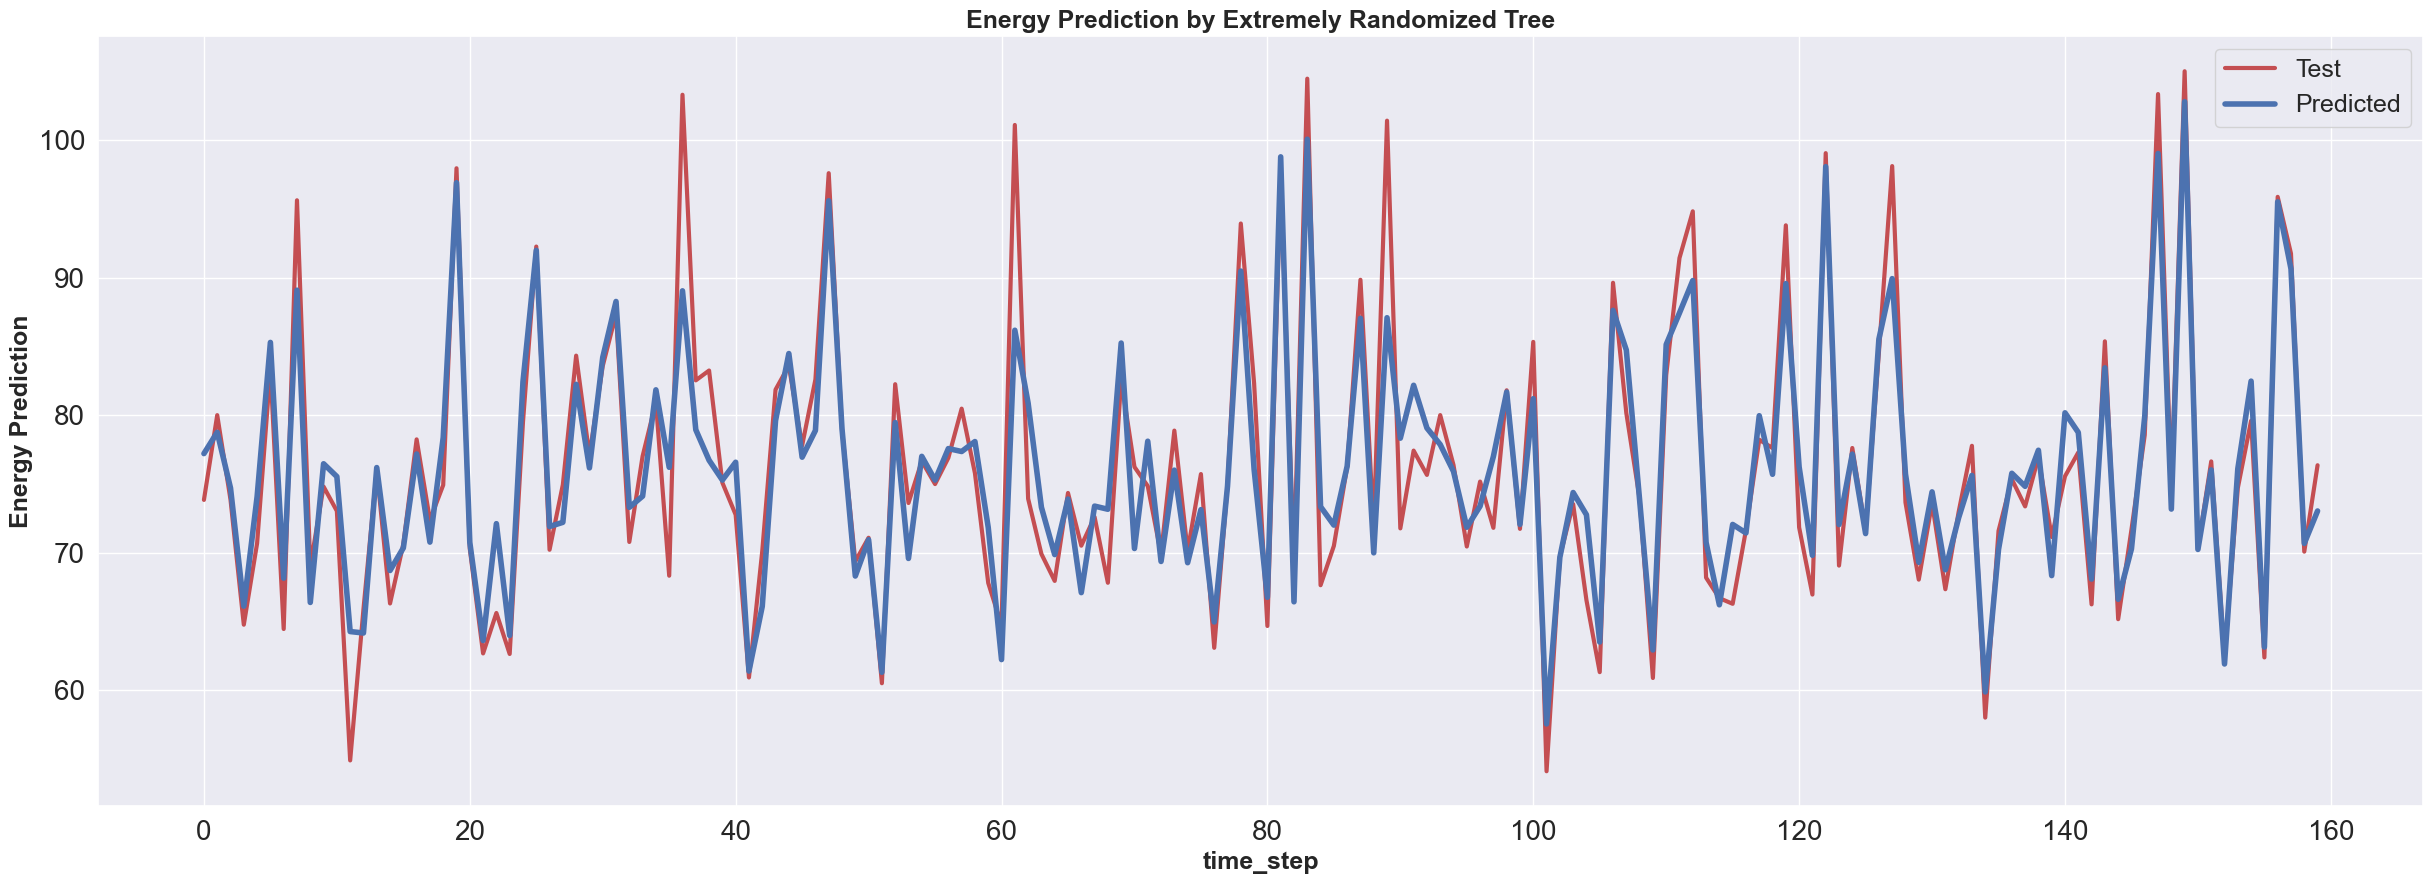

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# assuming y_test and y_hat1 are already defined

# downsample data to reduce number of data points
downsample_factor = 90
y_test_downsampled = y_test1[::downsample_factor]
y_hat2_downsampled = y_hat2n[::downsample_factor]

# create line plot
plt.figure(figsize=(30,10))
plt.plot(y_test_downsampled , 'r-', linewidth=3)
plt.plot(y_hat2_downsampled,'b-' , linewidth=4)
plt.xlabel('time_step', fontsize = 18, fontweight="bold")
plt.ylabel('Energy Prediction', fontsize = 18, fontweight="bold")
plt.legend (('Test','Predicted'), fontsize = 18)
plt.title("Energy Prediction by Extremely Randomized Tree", fontsize = 18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('PREDICTION by EXREMELY RANDOMIZED TREE Line Plot.png', format='png')
plt.savefig('PREDICTION by EXREMELY RANDOMIZED TREE Line Plot.pdf', format='pdf')
plt.show()

# *RANDOM FOREST REGRESSOR*

In [55]:
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(max_depth=20, n_estimators=400, max_features=0.9)
model3.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

C:\Users\Guest1\AppData\Local\Temp\ipykernel_11368\1501663348.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train,y_train)


Training time: 99.90072631835938 seconds


In [56]:
X_test1 = s.fit_transform(X_test)

y_hat3 = model3.predict(X_test1)
y_hat3n = s1.inverse_transform(y_hat3.reshape(-1, 1))
y_test3 = s1.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import sklearn.metrics as metrics
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test3, y_hat3n))
print("RMSE:",RMSE)
#mse

#mape
mape = mean_absolute_percentage_error(y_test3, y_hat3n) 
print("MAPE:",mape)
print ("Percentual:", metrics.mean_absolute_error(y_test3,y_hat3n)/y_test3.mean()*100, "%")

RMSE: 3.362781547168306
MAPE: 0.03244923466575623
Percentual: 3.2503359231103266 %


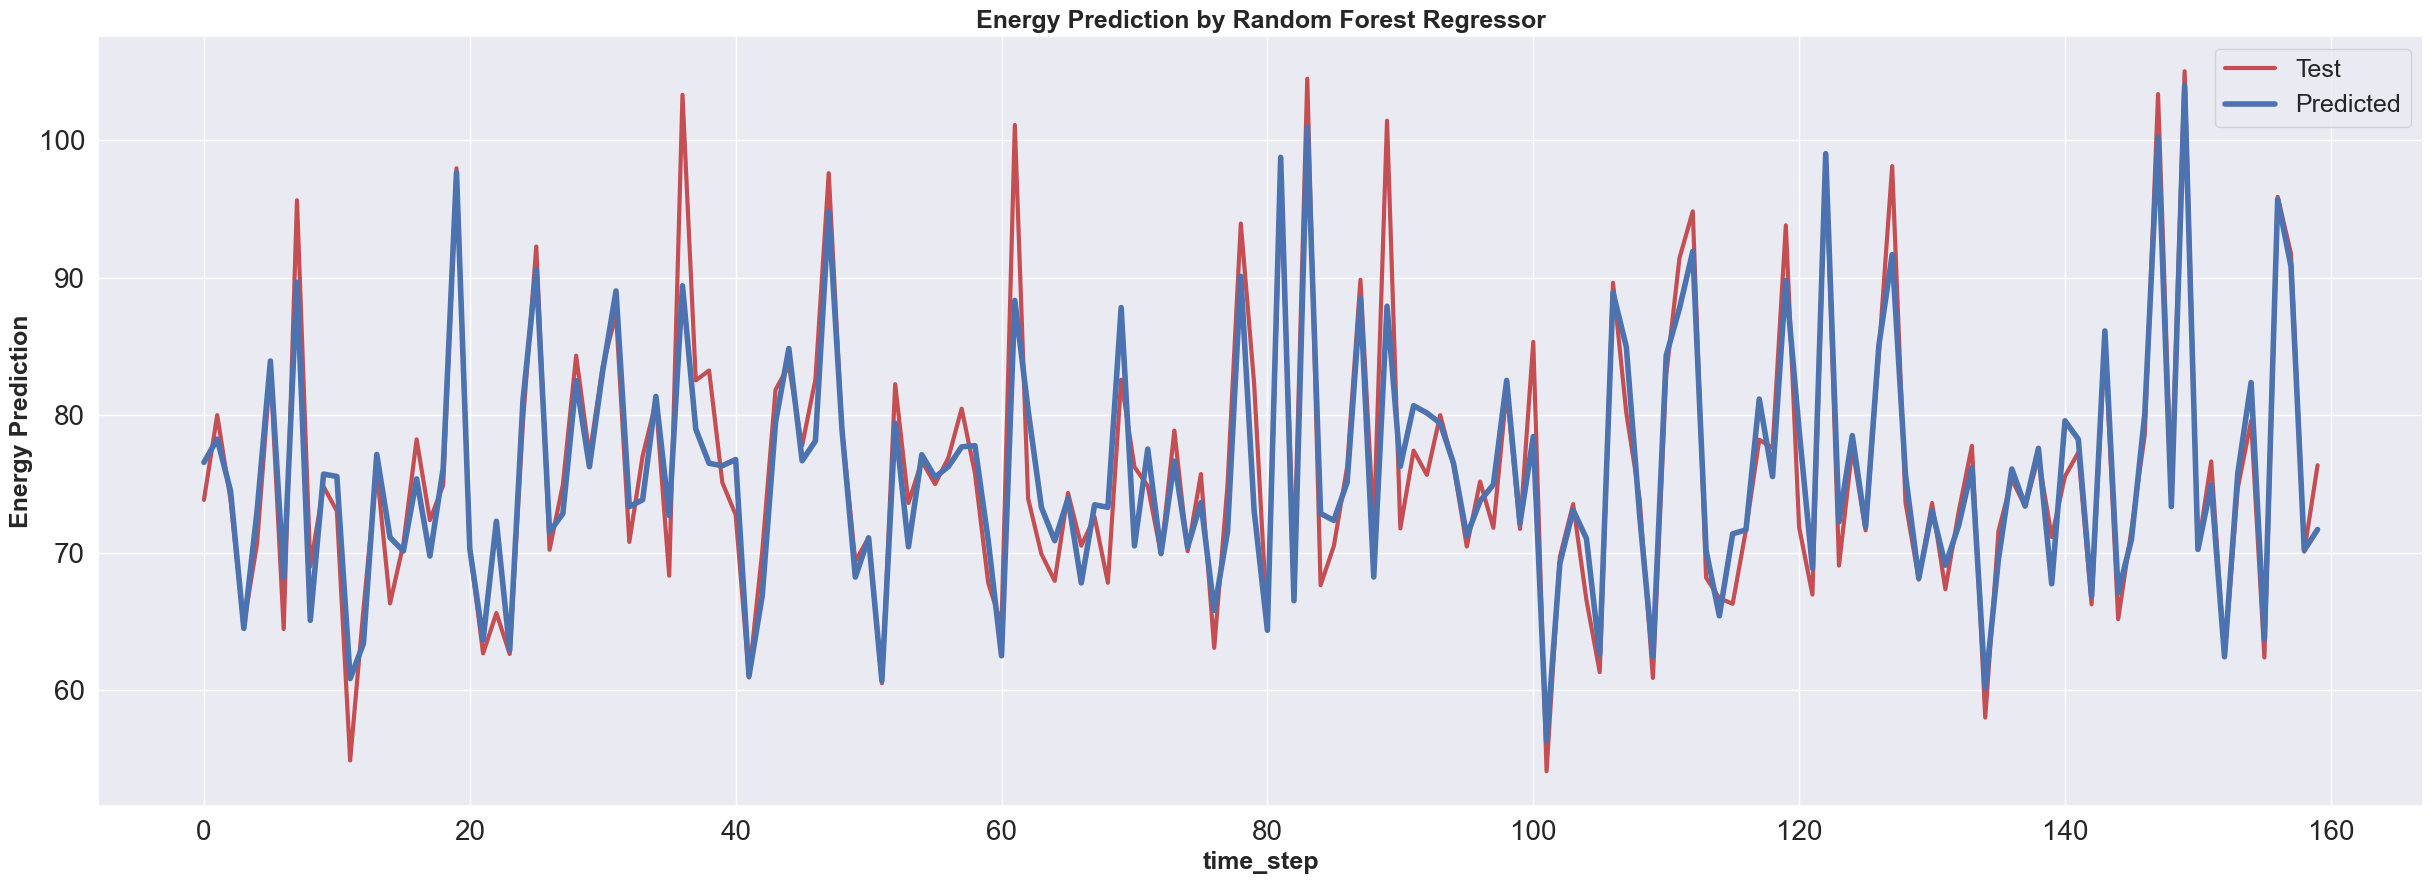

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# assuming y_test and y_hat1 are already defined

# downsample data to reduce number of data points
downsample_factor = 90
y_test_downsampled = y_test1[::downsample_factor]
y_hat3_downsampled = y_hat3n[::downsample_factor]

# create line plot
plt.figure(figsize=(30,10))
plt.plot(y_test_downsampled , 'r-', linewidth=3)
plt.plot(y_hat3_downsampled,'b-' , linewidth=4)
plt.xlabel('time_step', fontsize = 18, fontweight="bold")
plt.ylabel('Energy Prediction', fontsize = 18, fontweight="bold")
plt.legend (('Test','Predicted'), fontsize = 18)
plt.title("Energy Prediction by Random Forest Regressor", fontsize = 18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('PREDICTION by RANDOM FOREST REGRESSOR Line Plot.png', format='png')
plt.savefig('PREDICTION by RANDOM FOREST REGRESSOR Line Plot.pdf', format='pdf')
plt.show()

# *Gradient boosting machines*

In [58]:
start_time = time.time()
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(max_depth=8,
                                   loss='squared_error',
                                  n_estimators=400)
model4.fit(X_train,y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

C:\Users\Guest1\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 86.12333059310913 seconds


In [59]:
X_test1 = s.fit_transform(X_test)

y_hat4 = model4.predict(X_test1)
y_hat4n = s1.inverse_transform(y_hat4.reshape(-1, 1))
y_test4 = s1.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import sklearn.metrics as metrics
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test4, y_hat4n))
print("RMSE:",RMSE)
#mse

#mape
mape = mean_absolute_percentage_error(y_test4, y_hat4n) 
print("MAPE:",mape)
print ("Percentual:", metrics.mean_absolute_error(y_test4,y_hat4n)/y_test4.mean()*100, "%")

RMSE: 3.4736337849790413
MAPE: 0.03406318630550938
Percentual: 3.405146278126864 %


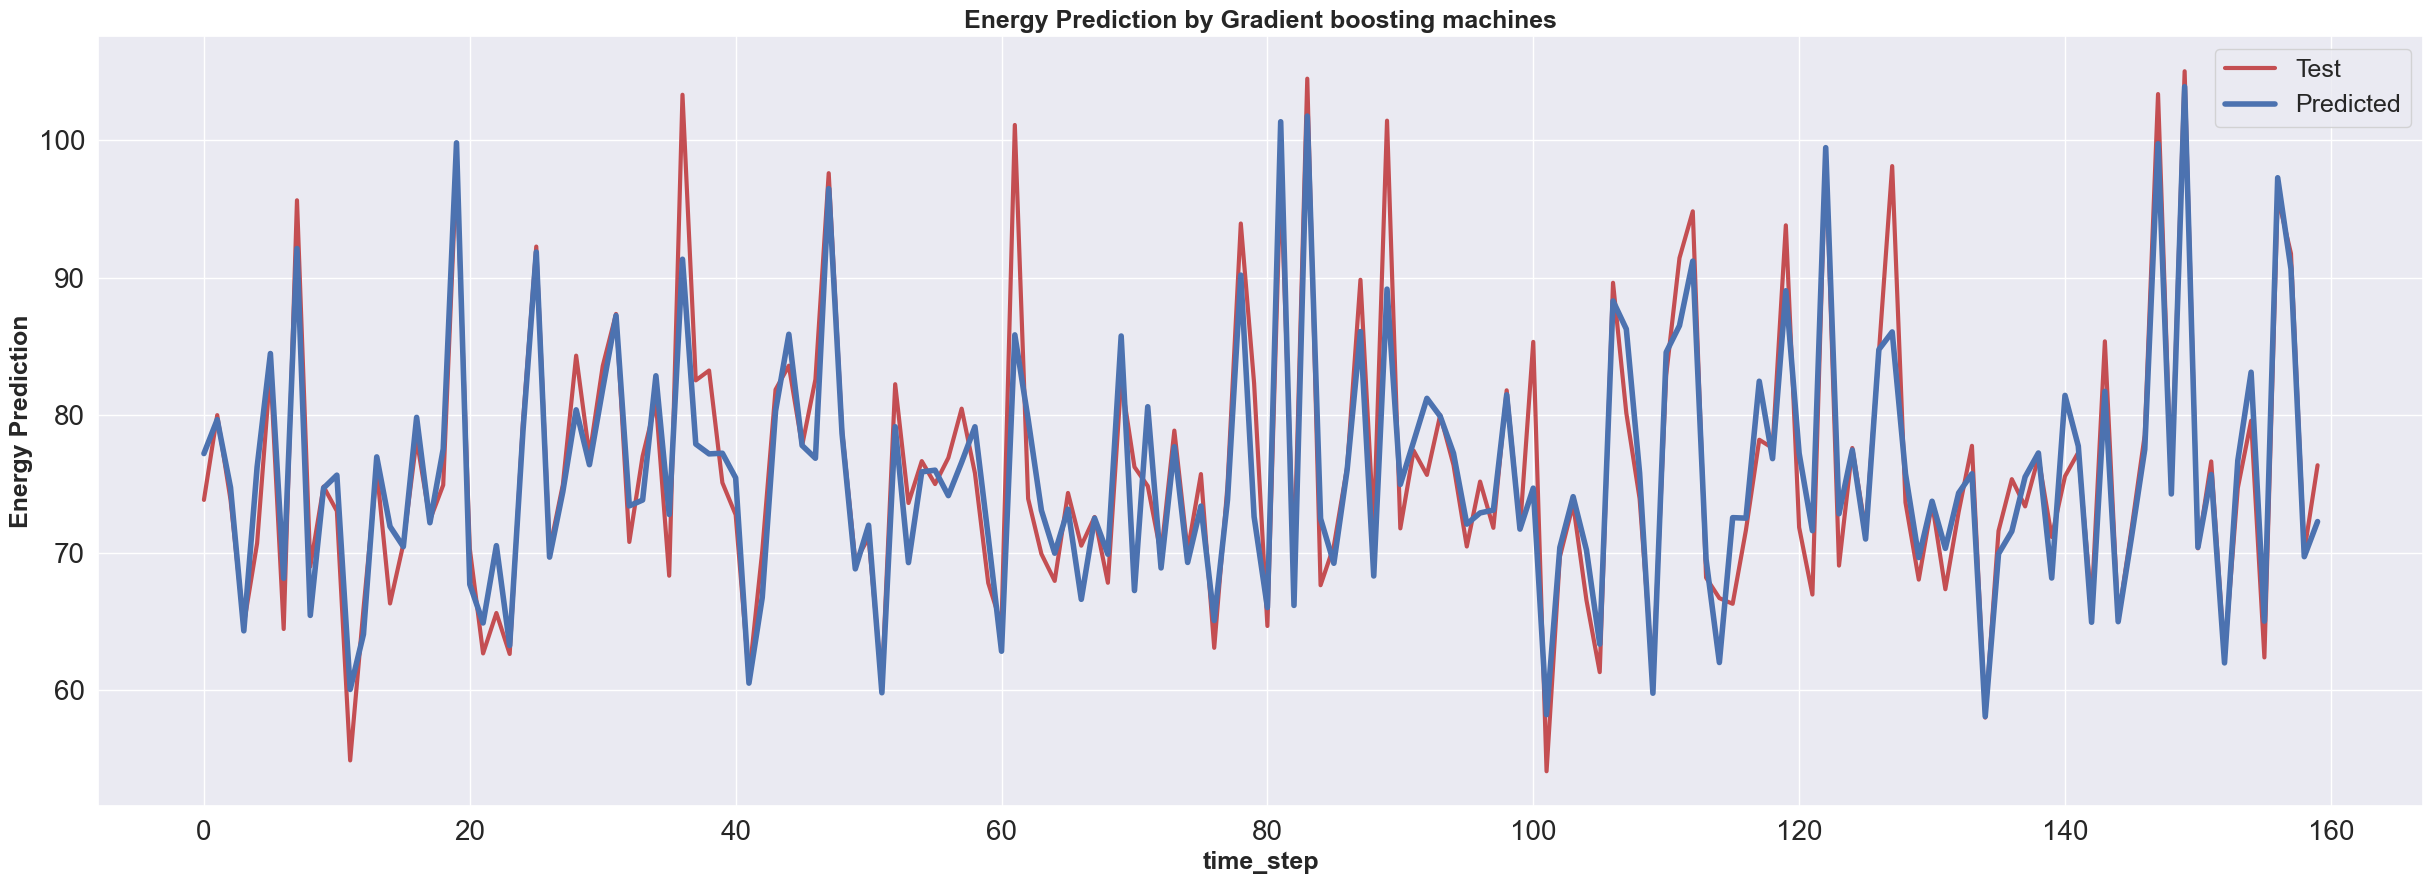

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# assuming y_test and y_hat1 are already defined

# downsample data to reduce number of data points
downsample_factor = 90
y_test_downsampled = y_test1[::downsample_factor]
y_hat4_downsampled = y_hat4n[::downsample_factor]

# create line plot
plt.figure(figsize=(30,10))
plt.plot(y_test_downsampled , 'r-', linewidth=3)
plt.plot(y_hat4_downsampled,'b-' , linewidth=4)
plt.xlabel('time_step', fontsize = 18, fontweight="bold")
plt.ylabel('Energy Prediction', fontsize = 18, fontweight="bold")
plt.legend (('Test','Predicted'), fontsize = 18)
plt.title("Energy Prediction by Gradient boosting machines", fontsize = 18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('PREDICTION by Gradient boosting machines Line Plot.png', format='png')
plt.savefig('PREDICTION by Gradient boosting machines Line Plot.pdf', format='pdf')
plt.show()

# **SVM**
* To 85k points, it runs in 2hs 26min
* C defaut:1.  The strength of the regularization is inversely proportional to C
* gamma default = scale = 1 / (n_features * X.var())

In [61]:
from sklearn.svm import SVR
start_time = time.time()
model5 = SVR(kernel='rbf',
            C=900,
            epsilon=1,
            gamma='scale',    
            cache_size=1000)
model5.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

C:\Users\Guest1\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 23.442914485931396 seconds


In [62]:
X_test1 = s.fit_transform(X_test)

y_hat5 = model5.predict(X_test1)
y_hat5n = s1.inverse_transform(y_hat5.reshape(-1, 1))
y_test1 = s1.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import sklearn.metrics as metrics
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test1, y_hat5n))
print("RMSE:",RMSE)
#mse

#mape
mape = mean_absolute_percentage_error(y_test1, y_hat5n) 
print("MAPE:",mape)
print ("Percentual:", metrics.mean_absolute_error(y_test1,y_hat5n)/y_test1.mean()*100, "%")

RMSE: 5.109171758509057
MAPE: 0.0536080181419316
Percentual: 5.31065600581782 %


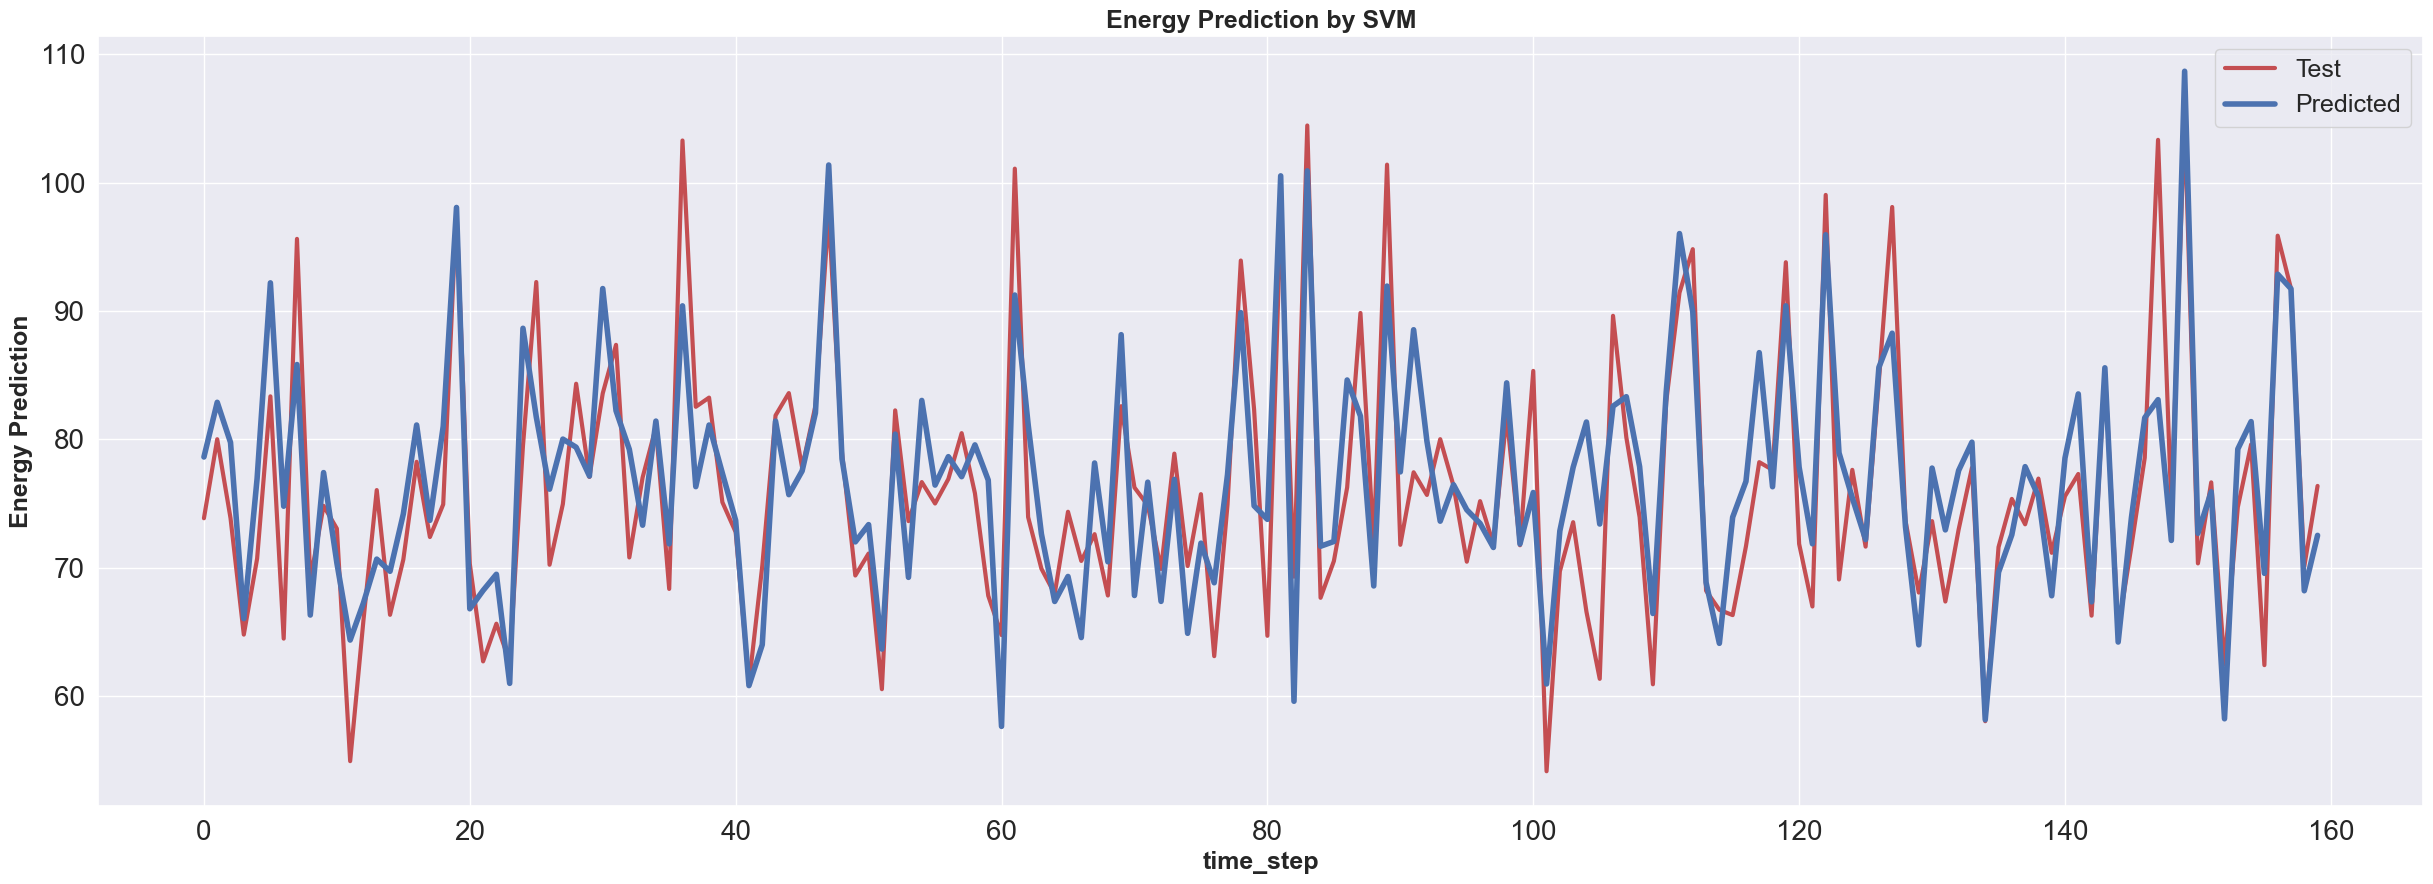

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# assuming y_test and y_hat1 are already defined

# downsample data to reduce number of data points
downsample_factor = 90
y_test_downsampled = y_test1[::downsample_factor]
y_hat5_downsampled = y_hat5n[::downsample_factor]

# create line plot
plt.figure(figsize=(30,10))
plt.plot(y_test_downsampled , 'r-', linewidth=3)
plt.plot(y_hat5_downsampled,'b-' , linewidth=4)
plt.xlabel('time_step', fontsize = 18, fontweight="bold")
plt.ylabel('Energy Prediction', fontsize = 18, fontweight="bold")
plt.legend (('Test','Predicted'), fontsize = 18)
plt.title("Energy Prediction by SVM", fontsize = 18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('PREDICTION by SVM Line Plot.png', format='png')
plt.savefig('PREDICTION by SVM Line Plot.pdf', format='pdf')
plt.show()

# **ANN**
* To 85k points, it runs in 7 min
* We wrap the model to allow compatibility with Scikitlearn

In [64]:
!pip install keras_tqdm

In [65]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [67]:
import keras
from keras import Sequential
from keras.layers import Dropout, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#utils
from keras_tqdm import TQDMNotebookCallback
from keras.models import save_model, load_model
from keras.utils.vis_utils import plot_model

In [68]:
from keras import backend as K

def val_mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

# Register custom metric
from keras.utils import get_custom_objects
get_custom_objects().update({'val_mean_absolute_error': val_mean_absolute_error})


In [69]:
# Define the ANN architecture
start_time = time.time()
def create_model():
    model6 = Sequential()
    model6.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
    model6.add(Dropout(0.3))
    model6.add(Dense(128, activation='relu'))
    model6.add(Dropout(0.2))
    model6.add(Dense(64, activation='relu'))
    model6.add(Dropout(0.2))
    model6.add(Dense(32, activation='relu'))
    model6.add(Dropout(0.1))
    model6.add(Dense(1, activation='linear'))

    # Compile the model
    model6.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse', 'mape'])

    return model6

# Initialize the ANN model, callbacks, and training parameters
model6 = create_model()
model_save_path = out_path + 'model6.h5'
callback_cp = ModelCheckpoint(model_save_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
callback_es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Train the ANN model
history = model6.fit(X_train, y_train, epochs=200, verbose=1, batch_size=32, validation_split=0.1, callbacks=[callback_cp, callback_es])

# Evaluate the ANN model
train_loss, train_mae, train_mse, train_mape = model6.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae, test_mse, test_mape = model6.evaluate(X_test, y_test, verbose=0)

# Print the results
print("Training Loss: {:.4f}, Training MAE: {:.4f}, Training MSE: {:.4f}, Training MAPE: {:.4f}".format(train_loss, train_mae, train_mse, train_mape))
print("Testing Loss: {:.4f}, Testing MAE: {:.4f}, Testing MSE: {:.4f}, Testing MAPE: {:.4f}".format(test_loss, test_mae, test_mse, test_mape))

# Extract loss values for each epoch from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
train_mse = history.history['mse']
val_mse = history.history['val_mse']
train_mape = history.history['mape']
val_mape = history.history['val_mape']

# Create a list of loss values with their corresponding labels
loss_data = [train_loss, val_loss, train_mae, val_mae, train_mse, val_mse, train_mape, val_mape]
labels = ['Training Loss', 'Validation Loss', 'Training MAE', 'Validation MAE', 'Training MSE', 'Validation MSE', 'Training MAPE', 'Validation MAPE']

end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Epoch 1/200
923/944 [============================>.] - ETA: 0s - loss: 0.4355 - mae: 0.4355 - mse: 0.3281 - mape: 271.6059
Epoch 1: val_loss improved from inf to 0.37219, saving model to assets\model6.h5
944/944 [==============================] - 3s 2ms/step - loss: 0.4352 - mae: 0.4352 - mse: 0.3275 - mape: 268.1994 - val_loss: 0.3722 - val_mae: 0.3722 - val_mse: 0.2422 - val_mape: 160.8932
Epoch 2/200
932/944 [============================>.] - ETA: 0s - loss: 0.3925 - mae: 0.3925 - mse: 0.2636 - mape: 289.3296
Epoch 2: val_loss improved from 0.37219 to 0.37182, saving model to assets\model6.h5
944/944 [==============================] - 2s 2ms/step - loss: 0.3920 - mae: 0.3920 - mse: 0.2630 - mape: 297.8964 - val_loss: 0.3718 - val_mae: 0.3718 - val_mse: 0.2467 - val_mape: 149.4633
Epoch 3/200
942/944 [============================>.] - ETA: 0s - loss: 0.3793 - mae: 0.3793 - mse: 0.2492 - mape: 290.1564
Epoch 3: val_loss improved from 0.37182 to 0.35672, saving model to assets\model6.h

927/944 [============================>.] - ETA: 0s - loss: 0.3212 - mae: 0.3212 - mse: 0.1854 - mape: 205.7398
Epoch 23: val_loss did not improve from 0.30748
944/944 [==============================] - 2s 2ms/step - loss: 0.3210 - mae: 0.3210 - mse: 0.1851 - mape: 204.3056 - val_loss: 0.3356 - val_mae: 0.3356 - val_mse: 0.2077 - val_mape: 127.5855
Epoch 24/200
933/944 [============================>.] - ETA: 0s - loss: 0.3198 - mae: 0.3198 - mse: 0.1850 - mape: 221.4676
Epoch 24: val_loss did not improve from 0.30748
944/944 [==============================] - 2s 2ms/step - loss: 0.3198 - mae: 0.3198 - mse: 0.1848 - mape: 220.1528 - val_loss: 0.3113 - val_mae: 0.3113 - val_mse: 0.1772 - val_mape: 134.3022
Epoch 25/200
923/944 [============================>.] - ETA: 0s - loss: 0.3201 - mae: 0.3201 - mse: 0.1850 - mape: 235.0983
Epoch 25: val_loss did not improve from 0.30748
944/944 [==============================] - 2s 2ms/step - loss: 0.3203 - mae: 0.3203 - mse: 0.1853 - mape: 234.0390 

937/944 [============================>.] - ETA: 0s - loss: 0.3076 - mae: 0.3076 - mse: 0.1708 - mape: 185.9859
Epoch 45: val_loss did not improve from 0.29516
944/944 [==============================] - 2s 2ms/step - loss: 0.3080 - mae: 0.3080 - mse: 0.1714 - mape: 185.2686 - val_loss: 0.3197 - val_mae: 0.3197 - val_mse: 0.1869 - val_mape: 128.0391
Epoch 46/200
935/944 [============================>.] - ETA: 0s - loss: 0.3079 - mae: 0.3079 - mse: 0.1723 - mape: 234.1709
Epoch 46: val_loss did not improve from 0.29516
944/944 [==============================] - 2s 2ms/step - loss: 0.3078 - mae: 0.3078 - mse: 0.1722 - mape: 233.0822 - val_loss: 0.3049 - val_mae: 0.3049 - val_mse: 0.1694 - val_mape: 133.4604
Epoch 47/200
937/944 [============================>.] - ETA: 0s - loss: 0.3061 - mae: 0.3061 - mse: 0.1704 - mape: 219.7524
Epoch 47: val_loss did not improve from 0.29516
944/944 [==============================] - 2s 2ms/step - loss: 0.3059 - mae: 0.3059 - mse: 0.1704 - mape: 218.8612 

Epoch 68/200
938/944 [============================>.] - ETA: 0s - loss: 0.3001 - mae: 0.3001 - mse: 0.1642 - mape: 217.6231
Epoch 68: val_loss did not improve from 0.29333
944/944 [==============================] - 2s 2ms/step - loss: 0.3000 - mae: 0.3000 - mse: 0.1641 - mape: 217.2398 - val_loss: 0.2972 - val_mae: 0.2972 - val_mse: 0.1627 - val_mape: 128.0505
Epoch 68: early stopping
Training Loss: 0.2790, Training MAE: 0.2790, Training MSE: 0.1457, Training MAPE: 149.1391
Testing Loss: 0.2943, Testing MAE: 0.2943, Testing MSE: 0.1597, Testing MAPE: 324.2614
Training time: 148.8283133506775 seconds


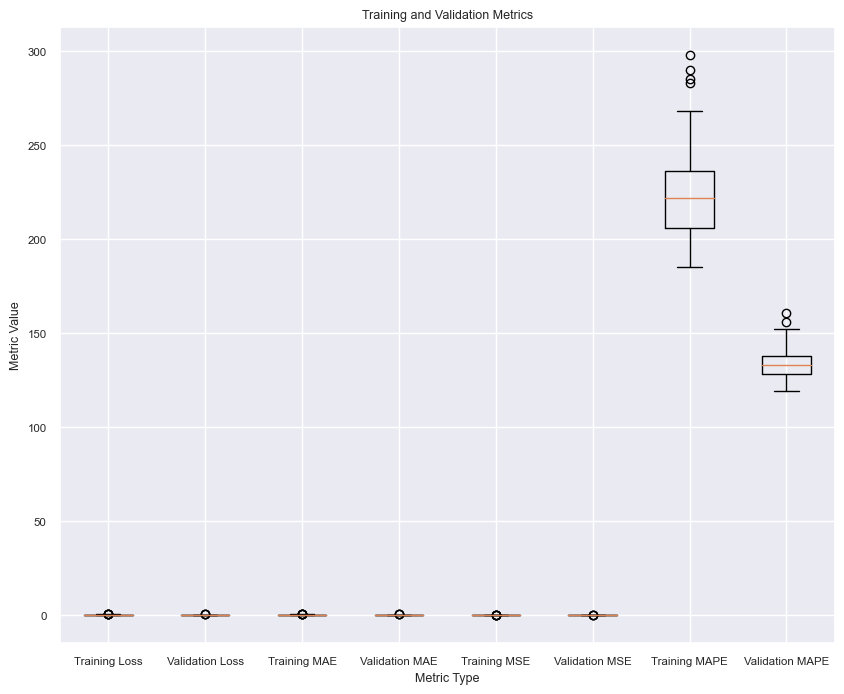

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

ax.boxplot(loss_data, labels=labels)

# Set plot title and axis labels
ax.set_title('Training and Validation Metrics')
ax.set_xlabel('Metric Type')
ax.set_ylabel('Metric Value')

# Save the figure as a PDF
fig.savefig('training_validation_metrics.pdf')

plt.show()

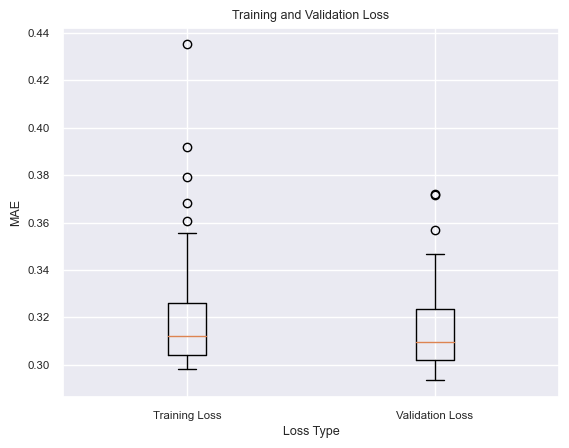

In [71]:
# Extract loss values for each epoch from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Create a list of loss values with their corresponding labels
loss_data = [train_loss, val_loss]
labels = ['Training Loss', 'Validation Loss']

# Create a box plot
plt.boxplot(loss_data, labels=labels)

# Set plot title and axis labels
plt.title('Training and Validation Loss')
plt.xlabel('Loss Type')
plt.ylabel('MAE')
fig.savefig('Training and Validation Loss.pdf')
plt.show()


In [72]:
X_test1 = s.fit_transform(X_test)

y_hat6 = model6.predict(X_test1)
y_hat6n = s1.inverse_transform(y_hat6.reshape(-1, 1))
y_test1 = s1.inverse_transform(y_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import sklearn.metrics as metrics
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test1, y_hat6n))
print("RMSE:",RMSE)
#mse

#mape
mape = mean_absolute_percentage_error(y_test1, y_hat6n) 
print("MAPE:",mape)
print ("Percentual:", metrics.mean_absolute_error(y_test1,y_hat6n)/y_test1.mean()*100, "%")

450/450 [==============================] - 1s 969us/step
RMSE: 3.9718766650915436
MAPE: 0.037870907971220995
Percentual: 3.817981865660743 %


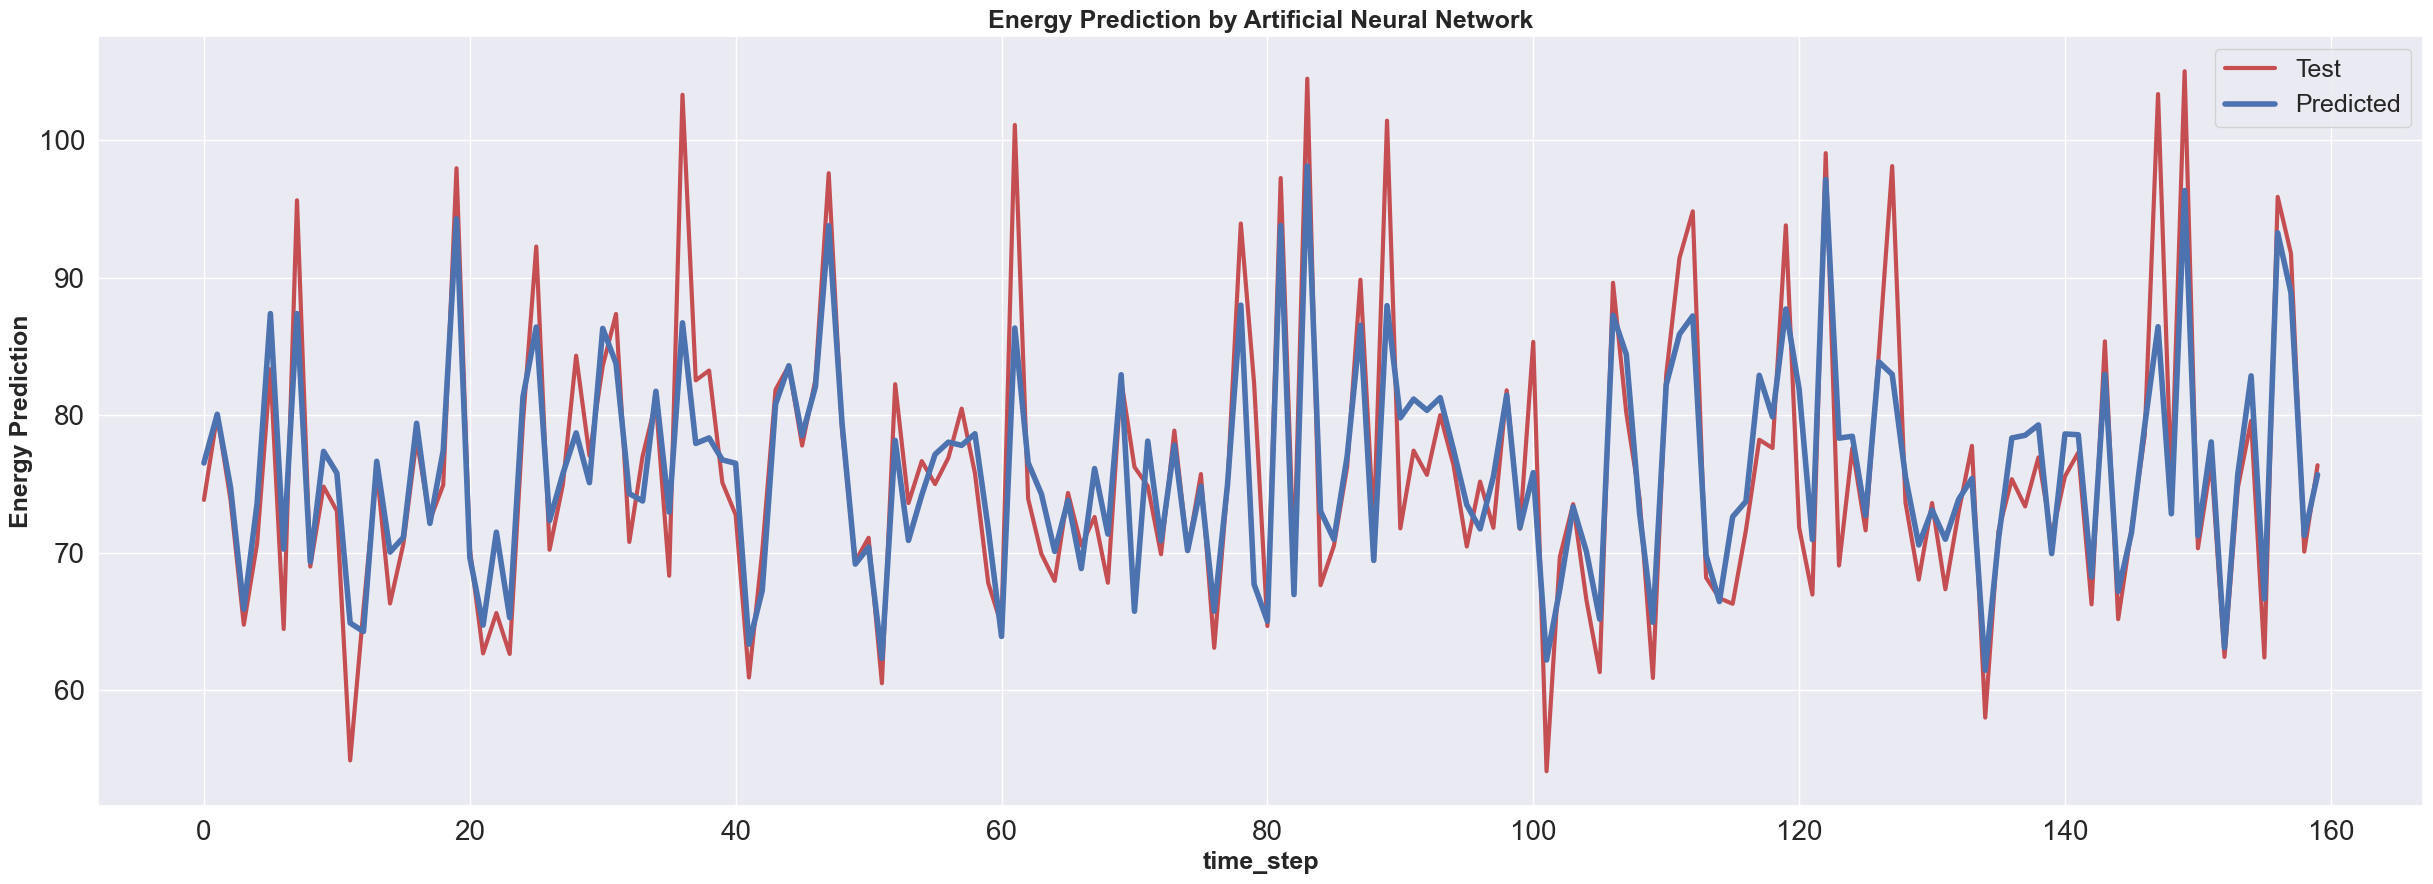

<Figure size 640x480 with 0 Axes>

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# assuming y_test and y_hat1 are already defined

# downsample data to reduce number of data points
downsample_factor = 90
y_test_downsampled = y_test1[::downsample_factor]
y_hat6_downsampled = y_hat6n[::downsample_factor]

# create line plot
plt.figure(figsize=(30,10))
plt.plot(y_test_downsampled , 'r-', linewidth=3)
plt.plot(y_hat6_downsampled,'b-' , linewidth=4)
plt.xlabel('time_step', fontsize = 18, fontweight="bold")
plt.ylabel('Energy Prediction', fontsize = 18, fontweight="bold")
plt.legend (('Test','Predicted'), fontsize = 18)
plt.title("Energy Prediction by Artificial Neural Network", fontsize = 18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
plt.savefig('PREDICTION by Artificial Neural Network Line Plot.png', format='png')
plt.savefig('PREDICTION by Artificial Neural Network Line Plot.pdf', format='pdf')